In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from tqdm import tqdm
import gc
import calendar

import matplotlib.colors as clr
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import matplotlib.ticker as tkr
import matplotlib.gridspec as gridspec
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
!ls "/content/drive/My Drive/"

 21711A0599.zip
'7dbfcaaf-52ae-4197-a161-f7f136236764 (1).jpeg'
 7dbfcaaf-52ae-4197-a161-f7f136236764.jpeg
 application_data.csv
'Colab Notebooks'
 columns_description.csv
 Fast-Dreambooth
'Getting started.pdf'
'IMDB Movies.xlsx'
 MUJACM_PamulaUdayini.zip
 previous_application.csv
'Receipt pay_NmdacztrT7Ymmt from GANESH NARUGARU (Paid).pdf'
'Trainity Assignments'
 udayinires.pdf
'WEB DEVELOPMENT INTERNSHIP OFFER LETTER.pdf'
'WhatsApp Image 2023-03-25 at 20.38.29.jpeg'


In [5]:
data = pd.read_csv('/content/drive/My Drive/application_data.csv')
print(data.head())

   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1     

In [ ]:
print(data.shape)

(49999, 122)


In [ ]:
print(data.isnull().sum())

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     6734
AMT_REQ_CREDIT_BUREAU_WEEK    6734
AMT_REQ_CREDIT_BUREAU_MON     6734
AMT_REQ_CREDIT_BUREAU_QRT     6734
AMT_REQ_CREDIT_BUREAU_YEAR    6734
Length: 122, dtype: int64


In [ ]:
print(data.describe())

          SK_ID_CURR        TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
count   49999.000000  49999.000000  49999.000000      4.999900e+04   
mean   129013.210584      0.080522      0.419848      1.707676e+05   
std     16690.512048      0.272102      0.724039      5.318191e+05   
min    100002.000000      0.000000      0.000000      2.565000e+04   
25%    114570.500000      0.000000      0.000000      1.125000e+05   
50%    129076.000000      0.000000      0.000000      1.458000e+05   
75%    143438.500000      0.000000      1.000000      2.025000e+05   
max    157875.000000      1.000000     11.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  4.999900e+04   49998.000000     4.996100e+04   
mean   5.997006e+05   27107.377355     5.390600e+05   
std    4.024154e+05   14562.944435     3.698533e+05   
min    4.500000e+04    2052.000000     4.500000e+04   
25%    2.700000e+05   16456.500000     2.385000e+05   
50%    5.147775e+05   24939.000000     

In [ ]:
data[data.duplicated(keep=False)].sort_values(by='SK_ID_CURR')

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, OWN_CAR_AGE, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3, APARTMENTS_AVG, BASEMENTAREA_AVG, YEARS_BEGINEXPLUATATION_AVG, YEARS_BUILD_AVG, COMMONAREA_AVG, ELEVATORS_AVG, ENTRANCES_AVG, FLOORSMAX_AVG, FLOORSMIN_AVG, LANDAREA_AVG, LIVINGAPARTMENTS_AVG, LIVINGAREA_AVG, NONLIVINGAPARTMENTS_AVG, NONLIVINGAREA_AVG, APARTMENTS_MODE, BASEMENTAREA_MODE, YEARS_BEGINEXPLUATATION_MODE, YEARS_BUILD_MODE, COMMONAREA_MODE, ELEVATORS_MODE, ENTRANCES_MODE, FLOORSMAX_MODE, FLOORSMIN_MODE, LANDAREA_MODE, LIVINGAPARTMENTS_MODE, LIVINGAREA_MODE, NONLIVINGAPARTMENTS_MODE, NONLIVINGAREA_MODE, APARTMENTS_MEDI, BASEMENTAREA_MEDI, YEARS_BEGINEXPLUATATION_MEDI, YEARS_BUILD_MEDI, COMMONAREA_MEDI, ELEVATORS_MEDI, ENTRANCES_MEDI, FLOORSMAX_MEDI, FLOORSMIN_MEDI, LANDAREA_MEDI, LIVINGAPARTMENTS_MEDI, LIVINGAREA_MEDI, NONLIVINGAPARTMENTS_MEDI, NONLIVINGAREA_MEDI, FONDKAPREMONT_MODE, HOUSETYPE_MODE, TOTALAREA_MODE, WALLSMATERIAL_MODE, EMERGENCYSTATE_MODE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, FLAG_DOCUMENT_4, FLAG_DOCUMENT_5, ...]
Index: []

In [ ]:
data[data.duplicated(subset=['SK_ID_CURR'], keep=False)].sort_values(by='SK_ID_CURR')

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, OWN_CAR_AGE, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3, APARTMENTS_AVG, BASEMENTAREA_AVG, YEARS_BEGINEXPLUATATION_AVG, YEARS_BUILD_AVG, COMMONAREA_AVG, ELEVATORS_AVG, ENTRANCES_AVG, FLOORSMAX_AVG, FLOORSMIN_AVG, LANDAREA_AVG, LIVINGAPARTMENTS_AVG, LIVINGAREA_AVG, NONLIVINGAPARTMENTS_AVG, NONLIVINGAREA_AVG, APARTMENTS_MODE, BASEMENTAREA_MODE, YEARS_BEGINEXPLUATATION_MODE, YEARS_BUILD_MODE, COMMONAREA_MODE, ELEVATORS_MODE, ENTRANCES_MODE, FLOORSMAX_MODE, FLOORSMIN_MODE, LANDAREA_MODE, LIVINGAPARTMENTS_MODE, LIVINGAREA_MODE, NONLIVINGAPARTMENTS_MODE, NONLIVINGAREA_MODE, APARTMENTS_MEDI, BASEMENTAREA_MEDI, YEARS_BEGINEXPLUATATION_MEDI, YEARS_BUILD_MEDI, COMMONAREA_MEDI, ELEVATORS_MEDI, ENTRANCES_MEDI, FLOORSMAX_MEDI, FLOORSMIN_MEDI, LANDAREA_MEDI, LIVINGAPARTMENTS_MEDI, LIVINGAREA_MEDI, NONLIVINGAPARTMENTS_MEDI, NONLIVINGAREA_MEDI, FONDKAPREMONT_MODE, HOUSETYPE_MODE, TOTALAREA_MODE, WALLSMATERIAL_MODE, EMERGENCYSTATE_MODE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, FLAG_DOCUMENT_4, FLAG_DOCUMENT_5, ...]
Index: []

In [ ]:
data1=pd.DataFrame()
data1['#_Null']=data.isna().sum().sort_values(ascending=False)
data1['#_Null']=data1['#_Null'].div(data.shape[0]).multiply(100).round(3)
data1.sort_values('#_Null', ascending=True, inplace=True)

In [ ]:
data1.shape

(122, 1)

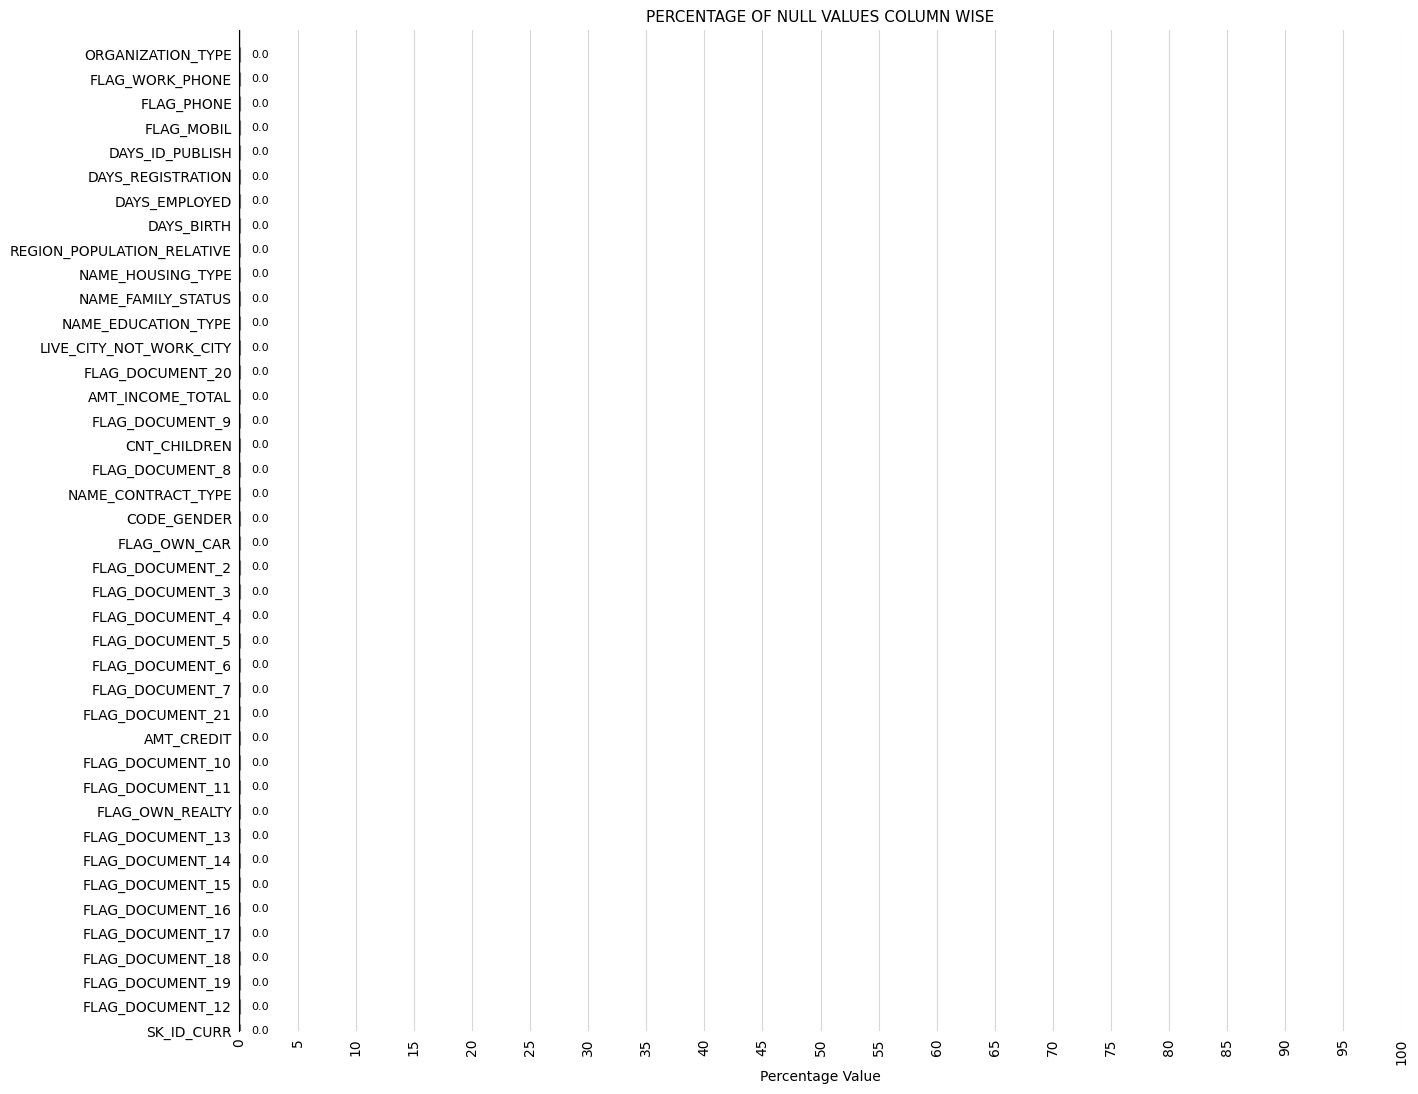

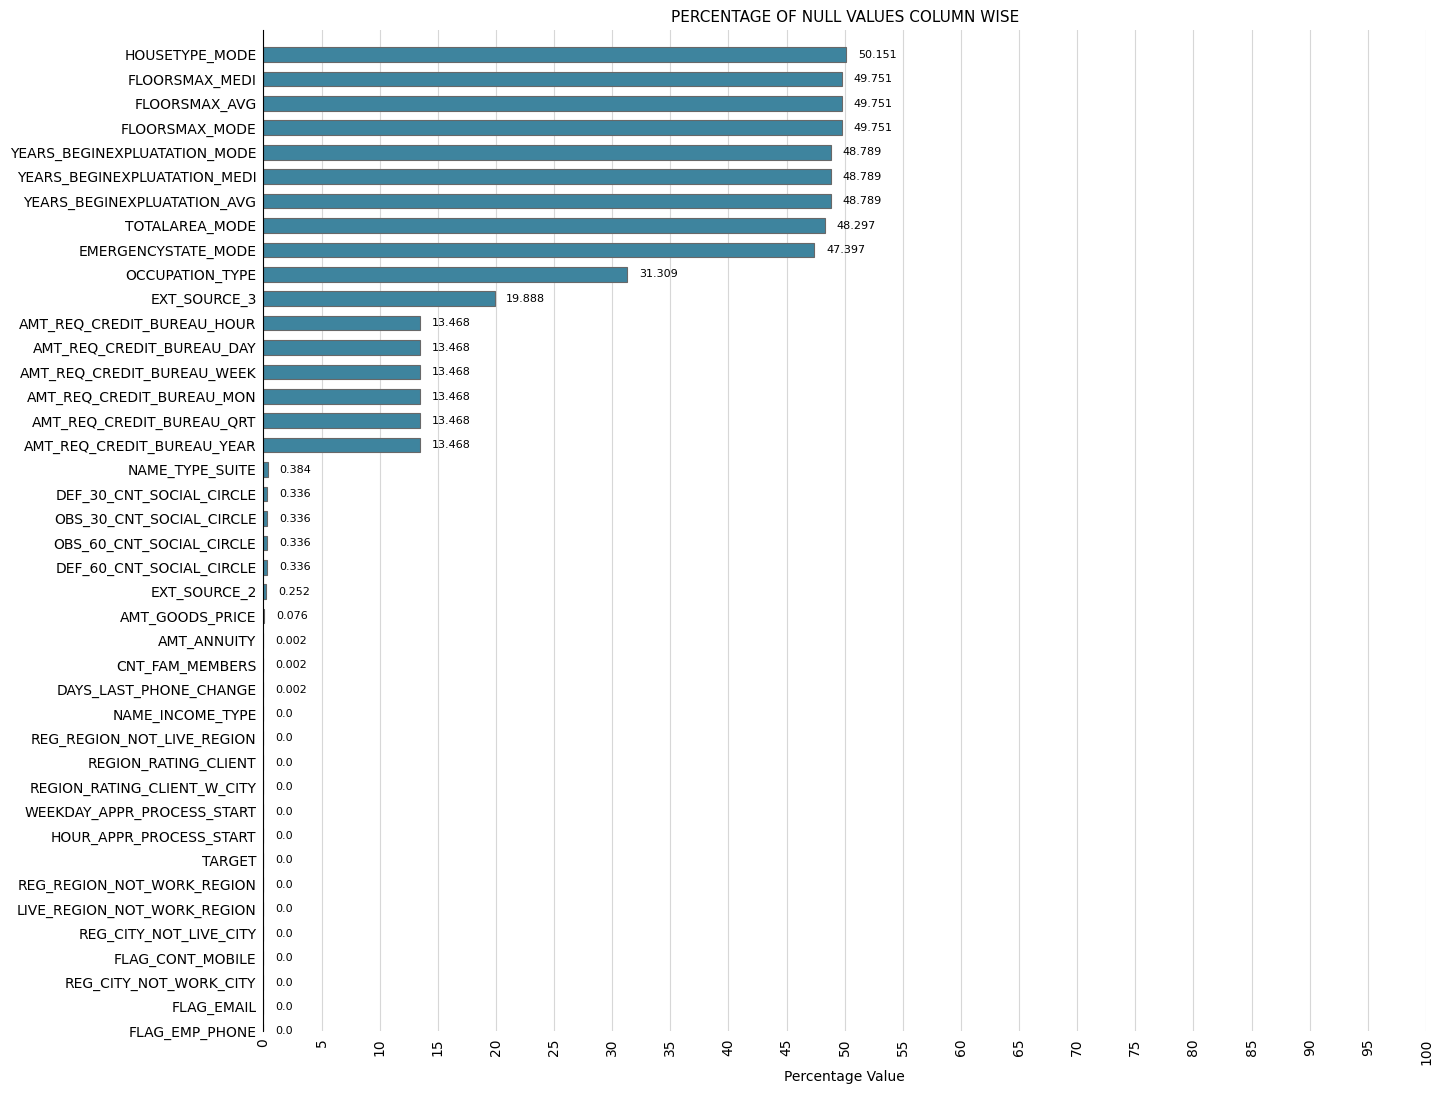

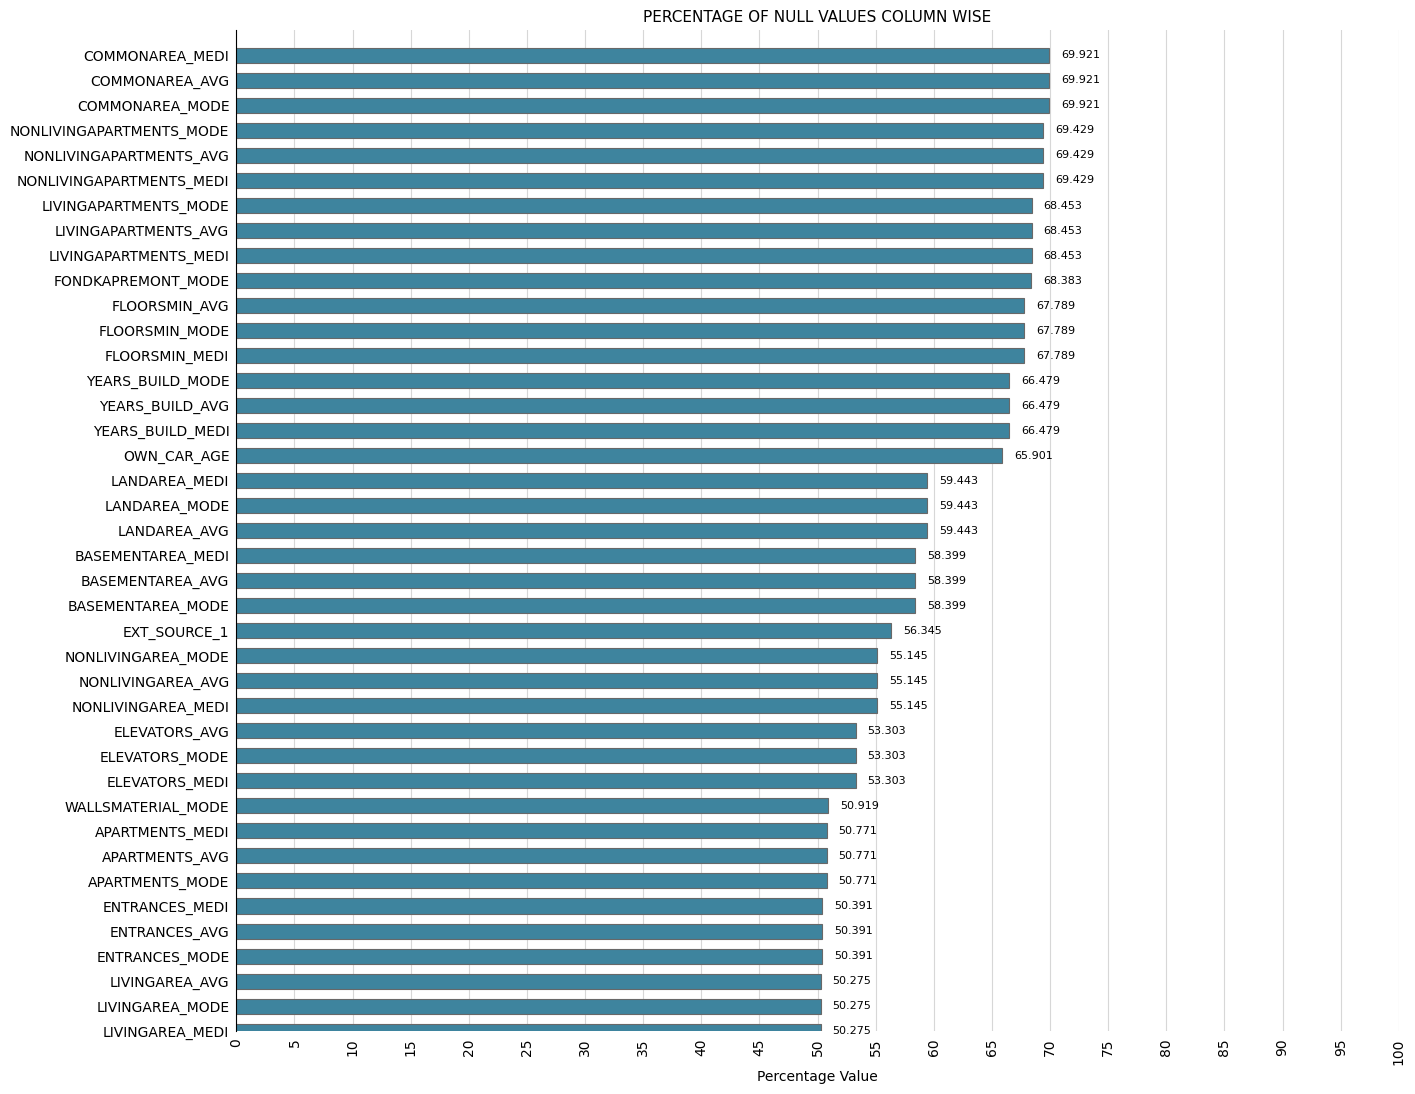

In [ ]:
for i in [0,41,82]:

    fig, axs = plt.subplots(1,1, figsize=(15,13))

    if i==82:
        a=40
    else:
        a=41

    axs.barh(data1.iloc[i:i+a].index, data1['#_Null'].iloc[i:i+a], height=0.6, linewidth=0.8, edgecolor='#686868', color='#3E849E')

    for p in axs.patches:
        axs.annotate(f"{round(p.get_width(),3)}", xy=(p.get_x()+p.get_width()+1, p.get_y()+p.get_height()/2), va='center', fontsize=8)

    #The axis lines on all but left side are removed for left hand side subplot
    axs.spines['top'].set_visible(False)
    axs.spines['right'].set_visible(False)
    axs.spines['bottom'].set_visible(False)

    # Grid is set for ticks in x-axis only
    axs.grid(axis='x', alpha=0.5)
    axs.set_axisbelow(True)

    axs.set_xticks(list(range(0,101,5)))
    axs.tick_params(axis='x', pad=5, length=0, labelrotation=90, labelsize=10)
    axs.set_xlabel('Percentage Value')
    axs.set_ylim(0, a)
    axs.set_yticks(list(range(0,a,1)), data1.iloc[i:i+a].index)
    axs.tick_params(axis='y', pad=5, length=0, labelsize=10)

    axs.set_title('PERCENTAGE OF NULL VALUES COLUMN WISE', fontsize=11)

    plt.show()

In [ ]:
data.drop(list(data1[data1['#_Null']>40].index), axis=1, inplace=True)
for idx,i in enumerate(data.columns):
    print(idx, '--', i)

0 -- SK_ID_CURR
1 -- TARGET
2 -- NAME_CONTRACT_TYPE
3 -- CODE_GENDER
4 -- FLAG_OWN_CAR
5 -- FLAG_OWN_REALTY
6 -- CNT_CHILDREN
7 -- AMT_INCOME_TOTAL
8 -- AMT_CREDIT
9 -- AMT_ANNUITY
10 -- AMT_GOODS_PRICE
11 -- NAME_TYPE_SUITE
12 -- NAME_INCOME_TYPE
13 -- NAME_EDUCATION_TYPE
14 -- NAME_FAMILY_STATUS
15 -- NAME_HOUSING_TYPE
16 -- REGION_POPULATION_RELATIVE
17 -- DAYS_BIRTH
18 -- DAYS_EMPLOYED
19 -- DAYS_REGISTRATION
20 -- DAYS_ID_PUBLISH
21 -- FLAG_MOBIL
22 -- FLAG_EMP_PHONE
23 -- FLAG_WORK_PHONE
24 -- FLAG_CONT_MOBILE
25 -- FLAG_PHONE
26 -- FLAG_EMAIL
27 -- OCCUPATION_TYPE
28 -- CNT_FAM_MEMBERS
29 -- REGION_RATING_CLIENT
30 -- REGION_RATING_CLIENT_W_CITY
31 -- WEEKDAY_APPR_PROCESS_START
32 -- HOUR_APPR_PROCESS_START
33 -- REG_REGION_NOT_LIVE_REGION
34 -- REG_REGION_NOT_WORK_REGION
35 -- LIVE_REGION_NOT_WORK_REGION
36 -- REG_CITY_NOT_LIVE_CITY
37 -- REG_CITY_NOT_WORK_CITY
38 -- LIVE_CITY_NOT_WORK_CITY
39 -- ORGANIZATION_TYPE
40 -- EXT_SOURCE_2
41 -- EXT_SOURCE_3
42 -- OBS_30_CNT_SOCIAL_CI

In [ ]:
l=['SK_ID_CURR', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
   'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
   'LIVE_CITY_NOT_WORK_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
   'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
   'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'EXT_SOURCE_2', 'EXT_SOURCE_3']

In [ ]:
l.extend(data.columns[47:67])
l

['SK_ID_CURR',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 

In [ ]:
data.drop(l, axis=1, inplace=True)

data2=pd.DataFrame()
data2['#_Null']=data.isna().sum().sort_values(ascending=False)
data2[data2['#_Null']>0]

#_Null
OCCUPATION_TYPE   15654
NAME_TYPE_SUITE     192
AMT_GOODS_PRICE      38
AMT_ANNUITY           1
CNT_FAM_MEMBERS       1

In [ ]:
data[data['OCCUPATION_TYPE'].isna()].head()

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
8        0         Cash loans           F            N               Y   
11       0         Cash loans           F            N               Y   
23       0         Cash loans           F            N               Y   
28       0         Cash loans           M            Y               Y   
30       0         Cash loans           F            N               Y   

    CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
8              0        112500.000   1019610.0      33826.5         913500.0   
11             0         38419.155    148365.0      10678.5         135000.0   
23             0         83250.000    239850.0      23850.0         225000.0   
28             0        270000.000    790830.0      57676.5         675000.0   
30             0        292500.000    665892.0      24592.5         477000.0   

   NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
8         Children             Pensioner  Secondary / secondary special   
11        Children             Pensioner  Secondary / secondary special   
23   Unaccompanied             Pensioner  Secondary / secondary special   
28   Unaccompanied         State servant               Higher education   
30   Unaccompanied  Commercial associate  Secondary / secondary special   

      NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
8                Married  House / apartment                    0.018634   
11               Married  House / apartment                    0.015221   
23               Married  House / apartment                    0.006296   
28  Single / not married  House / apartment                    0.046220   
30        Civil marriage  House / apartment                    0.025164   

    DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
8       -20099         365243              -7427            -3514           1   
11      -20417         365243              -5246            -2512           1   
23      -24827         365243              -9012            -3684           1   
28       -9994          -1796              -4668            -2661           1   
30      -15280          -2668              -5266            -3787           1   

    FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
8                0                0                 1           0           0   
11               0                0                 1           1           0   
23               0                0                 1           1           0   
28               1                0                 1           0           1   
30               1                0                 1           0           1   

   OCCUPATION_TYPE  CNT_FAM_MEMBERS WEEKDAY_APPR_PROCESS_START  \
8              NaN              2.0                  WEDNESDAY   
11             NaN              2.0                     FRIDAY   
23             NaN              2.0                     FRIDAY   
28             NaN              1.0                  WEDNESDAY   
30             NaN              2.0                  WEDNESDAY   

    HOUR_APPR_PROCESS_START       ORGANIZATION_TYPE  
8                        14                     XNA  
11                        7                     XNA  
23                       12                     XNA  
28                       11                Military  
30                       13  Business Entity Type 3

In [ ]:
data3=data[~(data['OCCUPATION_TYPE'].isna())][['OCCUPATION_TYPE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE']]
data3.head()

OCCUPATION_TYPE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE
0        Laborers          Working  Secondary / secondary special
1      Core staff    State servant               Higher education
2        Laborers          Working  Secondary / secondary special
3        Laborers          Working  Secondary / secondary special
4      Core staff          Working  Secondary / secondary special

In [ ]:
data4=data3.groupby(['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE'])['OCCUPATION_TYPE'].value_counts()
data4 = pd.DataFrame(data4)
data4.columns=['tmp_nm']
data4.reset_index(inplace=True)
data4.columns = ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE', 'COUNT']
data4 = data4.groupby(['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE'])[['OCCUPATION_TYPE', 'COUNT']].max().reset_index()
data4.head()

NAME_INCOME_TYPE NAME_EDUCATION_TYPE       OCCUPATION_TYPE  COUNT
0           Businessman    Higher education              Managers      2
1  Commercial associate     Academic degree           Sales staff      2
2  Commercial associate    Higher education  Waiters/barmen staff    867
3  Commercial associate   Incomplete higher  Waiters/barmen staff     92
4  Commercial associate     Lower secondary        Security staff     21

In [ ]:
data5=data[data['OCCUPATION_TYPE'].isna()]

for i in data5.index:

    nit=data5['NAME_INCOME_TYPE'].loc[i]
    net=data5['NAME_EDUCATION_TYPE'].loc[i]

    octyp=data4[(data4['NAME_INCOME_TYPE']==nit) & (data4['NAME_EDUCATION_TYPE']==net)]['OCCUPATION_TYPE'].values
    if len(octyp)==0:
        continue
    data['OCCUPATION_TYPE'].loc[i]=octyp[0]
data[data['OCCUPATION_TYPE'].isna()].shape

(8927, 31)

In [ ]:
data3['OCCUPATION_TYPE'].mode()[0]

'Laborers'

In [ ]:
data['OCCUPATION_TYPE'].fillna('Laborers', inplace=True)
data4=data[['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS']]
data4.value_counts().unstack(level=0, fill_value=0).rename(lambda c: f'NTS_{c}', axis=1).reset_index().rename_axis(columns=None)

NAME_INCOME_TYPE    NAME_FAMILY_STATUS  NTS_Children  NTS_Family  \
0            Businessman               Married             0           0   
1   Commercial associate               Married            73        1034   
2   Commercial associate  Single / not married             6         161   
3   Commercial associate        Civil marriage            11         133   
4   Commercial associate             Separated            13          57   
5   Commercial associate                 Widow            11          33   
6        Maternity leave               Married             0           0   
7              Pensioner               Married            92         940   
8              Pensioner  Single / not married            20         111   
9              Pensioner        Civil marriage            10          91   
10             Pensioner             Separated             7          62   
11             Pensioner                 Widow            42         215   
12         State servant               Married            20         353   
13         State servant  Single / not married             4          49   
14         State servant        Civil marriage             2          30   
15         State servant             Separated             3          19   
16         State servant                 Widow             1          13   
17               Student               Married             0           0   
18               Student  Single / not married             0           0   
19            Unemployed               Married             0           0   
20            Unemployed  Single / not married             0           0   
21            Unemployed                 Widow             0           0   
22               Working               Married           125        2340   
23               Working  Single / not married            37         370   
24               Working        Civil marriage            19         320   
25               Working             Separated            34         134   
26               Working                 Widow            12          84   

    NTS_Group of people  NTS_Other_A  NTS_Other_B  NTS_Spouse, partner  \
0                     0            0            0                    0   
1                     5           16           19                  321   
2                     2           18           13                   15   
3                     1            4            8                   51   
4                     1            6            8                    2   
5                     0            3            1                    0   
6                     0            0            0                    0   
7                     5            7           22                  262   
8                     0            2            3                    5   
9                     3            3            5                   18   
10                    0            1            4                    1   
11                    1            1           12                    2   
12                    0            4            6                  114   
13                    1            4            5                    2   
14                    0            3            2                   17   
15                    0            0            1                    2   
16                    0            0            1                    0   
17                    0            0            1                    0   
18                    0            0            0                    0   
19                    0            0            0                    0   
20                    0            0            0                    0   
21                    0            0            0                    0   
22                    9           24           74                  864   
23                    4           19           42                   31   
24                    4      

In [7]:
data['NAME_TYPE_SUITE'].fillna('Unaccompanied', inplace=True)


In [8]:
data['AMT_GOODS_PRICE'].fillna(data['AMT_CREDIT'], inplace=True)

In [6]:
data[data['AMT_ANNUITY'].isna()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
47531      155054       0         Cash loans           M            N   

      FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
47531               N             0          180000.0    450000.0   

       AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
47531          NaN         450000.0   Unaccompanied  Commercial associate   

      NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
47531   Incomplete higher  Single / not married  House / apartment   

       REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
47531                    0.026392      -10668          -2523   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
47531              -4946            -3238          NaN           1   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
47531               1                1                 1           1   

       FLAG_EMAIL        OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
47531           0  High skill tech staff              1.0   

       REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
47531                     2                            2   

      WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
47531                  WEDNESDAY                       13   

       REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
47531                           0                           0   

       LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
47531                            0                       0   

       REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
47531                       0                        0   

            ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
47531  Business Entity Type 3           NaN      0.626896      0.372334   

       APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  \
47531          0.0124               NaN                       0.9662   

       YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  \
47531              NaN             NaN            0.0         0.0345   

       FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  \
47531         0.0417            NaN           NaN                   NaN   

       LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  \
47531          0.0115                      NaN                0.0   

       APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  \
47531           0.0126                NaN                        0.9662   

       YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  \
47531               NaN              NaN             0.0          0.0345   

       FLOORSMAX_MODE  FLOORSMIN_MODE  LANDAREA_MODE  LIVINGAPARTMENTS_MODE  \
47531          0.0417             NaN            NaN                    NaN   

       LIVINGAREA_MODE  NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  \
47531           0.0119                       NaN                 0.0   

       APARTMENTS_MEDI  BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  \
47531           0.0125                NaN                        0.9662   

       YEARS_BUILD_MEDI  COMMONAREA_MEDI  ELEVATORS_MEDI  ENTRANCES_MEDI  \
47531               NaN              NaN             0.0          0.0345   

       FLOORSMAX_MEDI  FLOORSMIN_MEDI  LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  \
47531          0.0417             NaN            NaN                    NaN   

       LIVINGAREA_MEDI  NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI  \
47531           0.0117                       NaN                 0.0   

      FONDKAPREMONT_MODE  HOUSETYPE_MODE  TOTALAREA_MODE WALLSMATERIAL_MODE  \
47531                NaN  block of flats           0.009       Stone, brick   

      EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
47531                  No                       1.0                       0.0   

 

In [ ]:
data[(data['AMT_CREDIT']==450000.0) & (data['AMT_INCOME_TOTAL']==180000.0)]['AMT_ANNUITY'].median()

22500.0

In [ ]:
data['AMT_ANNUITY'].fillna(22500.0, inplace=True)
data['CNT_FAM_MEMBERS'].fillna(data['CNT_FAM_MEMBERS'].median(), inplace=True)

data2=pd.DataFrame()
data2['#_Null']=data.isna().sum().sort_values(ascending=False)
data2

#_Null
TARGET                           0
DAYS_BIRTH                       0
HOUR_APPR_PROCESS_START          0
WEEKDAY_APPR_PROCESS_START       0
CNT_FAM_MEMBERS                  0
OCCUPATION_TYPE                  0
FLAG_EMAIL                       0
FLAG_PHONE                       0
FLAG_CONT_MOBILE                 0
FLAG_WORK_PHONE                  0
FLAG_EMP_PHONE                   0
FLAG_MOBIL                       0
DAYS_ID_PUBLISH                  0
DAYS_REGISTRATION                0
DAYS_EMPLOYED                    0
REGION_POPULATION_RELATIVE       0
NAME_CONTRACT_TYPE               0
NAME_HOUSING_TYPE                0
NAME_FAMILY_STATUS               0
NAME_EDUCATION_TYPE              0
NAME_INCOME_TYPE                 0
NAME_TYPE_SUITE                  0
AMT_GOODS_PRICE                  0
AMT_ANNUITY                      0
AMT_CREDIT                       0
AMT_INCOME_TOTAL                 0
CNT_CHILDREN                     0
FLAG_OWN_REALTY                  0
FLAG_OWN_CAR                     0
CODE_GENDER                      0
ORGANIZATION_TYPE                0

In [ ]:
for i in data:
    print('='*100)
    print('\n')
    print("Column: ", i)
    print("Unique Values: ", data[i].unique())
    print('\n')
    print('='*100)



Column:  TARGET
Unique Values:  [1 0]




Column:  NAME_CONTRACT_TYPE
Unique Values:  ['Cash loans' 'Revolving loans']




Column:  CODE_GENDER
Unique Values:  ['M' 'F' 'XNA']




Column:  FLAG_OWN_CAR
Unique Values:  ['N' 'Y']




Column:  FLAG_OWN_REALTY
Unique Values:  ['Y' 'N']




Column:  CNT_CHILDREN
Unique Values:  [ 0  1  2  3  4  7  5  6  8  9 11]




Column:  AMT_INCOME_TOTAL
Unique Values:  [2.02500000e+05 2.70000000e+05 6.75000000e+04 1.35000000e+05
 1.21500000e+05 9.90000000e+04 1.71000000e+05 3.60000000e+05
 1.12500000e+05 3.84191550e+04 2.25000000e+05 1.89000000e+05
 1.57500000e+05 1.08000000e+05 8.10000000e+04 9.00000000e+04
 4.50000000e+05 8.32500000e+04 2.92500000e+05 1.98000000e+05
 1.80000000e+05 1.30500000e+05 5.40000000e+04 5.40000000e+05
 7.65000000e+04 3.24000000e+05 1.03500000e+05 9.45000000e+04
 1.26000000e+05 7.20000000e+04 1.93500000e+05 3.15000000e+05
 2.43000000e+05 8.55000000e+04 1.62000000e+05 1.17000000e+05
 2.47500000e+05 1.44000000e+05 1.75500000e+

In [ ]:
data[data['CODE_GENDER']=='XNA']

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
35657       0    Revolving loans         XNA            Y               Y   
38566       0    Revolving loans         XNA            N               Y   

       CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
35657             0          207000.0    382500.0      19125.0   
38566             2          157500.0    270000.0      13500.0   

       AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
35657         337500.0   Unaccompanied          Working   
38566         225000.0          Family          Working   

                 NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
35657  Secondary / secondary special            Married  Municipal apartment   
38566  Secondary / secondary special            Married    House / apartment   

       REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
35657                    0.020713      -20232         -10044   
38566                    0.026392      -13717          -2797   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
35657             -10024            -3537           1               1   
38566              -2241            -4659           1               1   

       FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
35657                1                 1           1           0   
38566                1                 1           1           0   

            OCCUPATION_TYPE  CNT_FAM_MEMBERS WEEKDAY_APPR_PROCESS_START  \
35657  Waiters/barmen staff              2.0                    TUESDAY   
38566    Low-skill Laborers              4.0                     FRIDAY   

       HOUR_APPR_PROCESS_START       ORGANIZATION_TYPE  
35657                       10  Business Entity Type 1  
38566                       16        Industry: type 3

In [ ]:
data['CODE_GENDER'].mode()

0    F
Name: CODE_GENDER, dtype: object

In [9]:
data['CODE_GENDER'].replace('XNA', 'F', inplace=True)

In [10]:
data[data['ORGANIZATION_TYPE']=='XNA']['NAME_INCOME_TYPE'].value_counts()

NAME_INCOME_TYPE
Pensioner     8918
Unemployed       6
Name: count, dtype: int64

In [ ]:
data['ORGANIZATION_TYPE'].replace('XNA', 'No Work', inplace=True)

del [[data1, data2, data3, data4, data5]]
import gc
gc.collect()

0

In [ ]:
data.head()

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0       1         Cash loans           M            N               Y   
1       0         Cash loans           F            N               N   
2       0    Revolving loans           M            Y               Y   
3       0         Cash loans           F            N               Y   
4       0         Cash loans           M            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working  Secondary / secondary special   
1          Family    State servant               Higher education   
2   Unaccompanied          Working  Secondary / secondary special   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
0       -9461           -637              -3648            -2120           1   
1      -16765          -1188              -1186             -291           1   
2      -19046           -225              -4260            -2531           1   
3      -19005          -3039              -9833            -2437           1   
4      -19932          -3038              -4311            -3458           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                0                 1           1           0   
2               1                1                 1           1           0   
3               1                0                 1           0           0   
4               1                0                 1           0           0   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS WEEKDAY_APPR_PROCESS_START  \
0        Laborers              1.0                  WEDNESDAY   
1      Core staff              2.0                     MONDAY   
2        Laborers              1.0                     MONDAY   
3        Laborers              2.0                  WEDNESDAY   
4      Core staff              1.0                   THURSDAY   

   HOUR_APPR_PROCESS_START       ORGANIZATION_TYPE  
0                       10  Business Entity Type 3  
1                       11                  School  
2                        9              Government  
3                       17  Business Entity Type 3  
4                       11                Religion

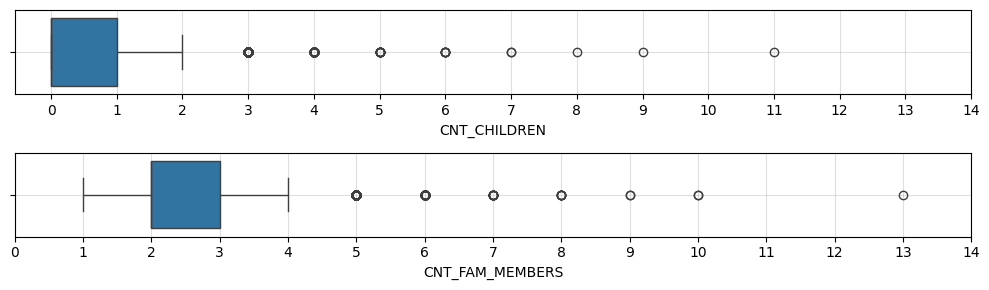

In [ ]:
data1=data[['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS']]
fig, axs =plt.subplots(2,1, figsize=(10,3))

sns.boxplot(x=data['CNT_CHILDREN'], ax=axs[0])
axs[0].set_xticks(list(np.arange(0,15,1)))
axs[0].grid(axis='y', alpha=0.4)
axs[0].grid(axis='x', alpha=0.4)
axs[0].set_axisbelow(True)

sns.boxplot(x=data['CNT_FAM_MEMBERS'], ax=axs[1])
axs[1].set_xticks(list(np.arange(0,15,1)))
axs[1].grid(axis='y', alpha=0.4)
axs[1].grid(axis='x', alpha=0.4)
axs[1].set_axisbelow(True)

fig.tight_layout()
plt.show()

In [ ]:
(data['CNT_FAM_MEMBERS']-data['CNT_CHILDREN']).unique()

array([1., 2.])

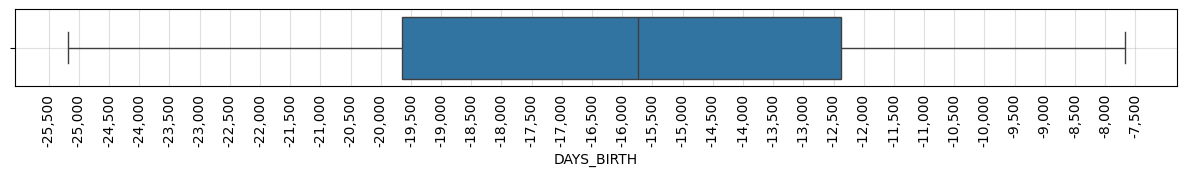

In [ ]:
import matplotlib.ticker as tkr
def func(x, pos):
    s = '{:0,d}'.format(int(x))
    return s
x_format = tkr.FuncFormatter(func)
fig, axs =plt.subplots(1,1, figsize=(15,1))

sns.boxplot(x=data['DAYS_BIRTH'], ax=axs)
axs.set_xticks(list(np.arange(-7500,-26000,-500)))
axs.tick_params(axis='x', pad=5, length=0, labelrotation=90)
axs.grid(axis='y', alpha=0.4)
axs.grid(axis='x', alpha=0.4)
axs.set_axisbelow(True)
axs.xaxis.set_major_formatter(x_format)

fig.tight_layout()
plt.show()

In [ ]:
round(data['DAYS_BIRTH'].abs().max()/365, 3)

68.997

In [ ]:
round(data['DAYS_BIRTH'].abs().min()/365, 3)

21.041

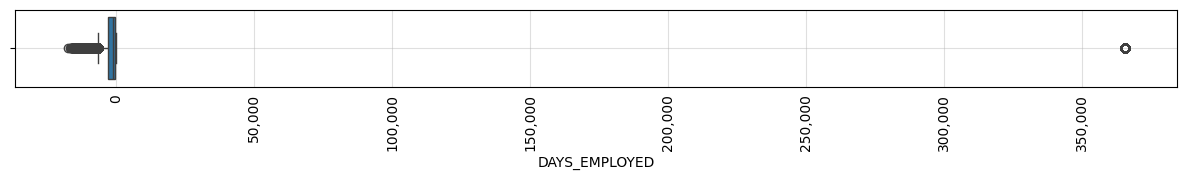

In [ ]:
fig, axs =plt.subplots(1,1, figsize=(15,1))

sns.boxplot(x=data['DAYS_EMPLOYED'], ax=axs)
axs.tick_params(axis='x', pad=5, length=0, labelrotation=90)
axs.grid(axis='y', alpha=0.4)
axs.grid(axis='x', alpha=0.4)
axs.set_axisbelow(True)
axs.xaxis.set_major_formatter(x_format)

fig.tight_layout()
plt.show()

In [ ]:
data[data['DAYS_EMPLOYED']>0].head()

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
8        0         Cash loans           F            N               Y   
11       0         Cash loans           F            N               Y   
23       0         Cash loans           F            N               Y   
38       0         Cash loans           F            N               Y   
43       0         Cash loans           F            N               Y   

    CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
8              0        112500.000   1019610.0      33826.5         913500.0   
11             0         38419.155    148365.0      10678.5         135000.0   
23             0         83250.000    239850.0      23850.0         225000.0   
38             0         99000.000    247275.0      17338.5         225000.0   
43             0        108000.000    746280.0      42970.5         675000.0   

   NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
8         Children        Pensioner  Secondary / secondary special   
11        Children        Pensioner  Secondary / secondary special   
23   Unaccompanied        Pensioner  Secondary / secondary special   
38   Unaccompanied        Pensioner  Secondary / secondary special   
43   Unaccompanied        Pensioner               Higher education   

      NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
8                Married  House / apartment                    0.018634   
11               Married  House / apartment                    0.015221   
23               Married  House / apartment                    0.006296   
38               Married  House / apartment                    0.006207   
43  Single / not married  House / apartment                    0.010966   

    DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
8       -20099         365243              -7427            -3514           1   
11      -20417         365243              -5246            -2512           1   
23      -24827         365243              -9012            -3684           1   
38      -23920         365243              -9817            -4969           1   
43      -23548         365243              -5745            -4576           1   

    FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
8                0                0                 1           0           0   
11               0                0                 1           1           0   
23               0                0                 1           1           0   
38               0                0                 1           1           0   
43               0                0                 1           0           0   

   OCCUPATION_TYPE  CNT_FAM_MEMBERS WEEKDAY_APPR_PROCESS_START  \
8         Laborers              2.0                  WEDNESDAY   
11        Laborers              2.0                     FRIDAY   
23        Laborers              2.0                     FRIDAY   
38        Laborers              2.0                     FRIDAY   
43        Laborers              1.0                  WEDNESDAY   

    HOUR_APPR_PROCESS_START ORGANIZATION_TYPE  
8                        14           No Work  
11                        7           No Work  
23                       12           No Work  
38                       11           No Work  
43                        9           No Work

In [ ]:
data[data['DAYS_EMPLOYED']>0].shape

(8924, 31)

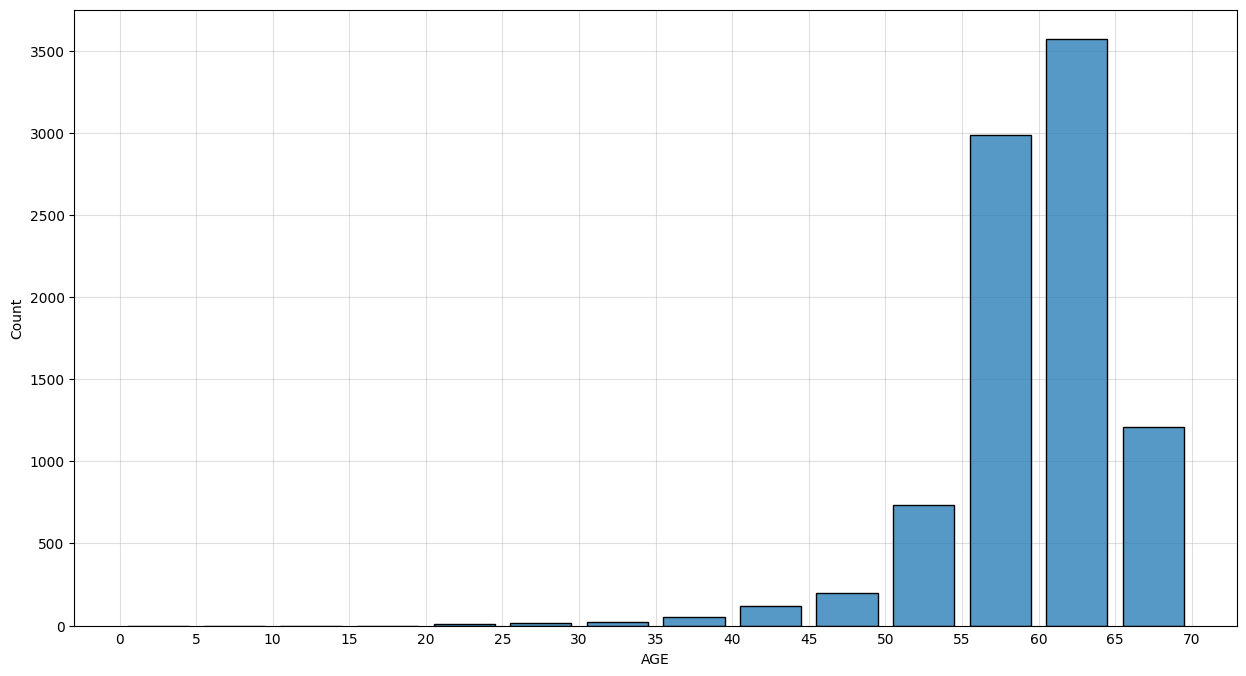

In [ ]:
fig, axs =plt.subplots(1,1, figsize=(15,8))

sns.histplot(x=data[data['DAYS_EMPLOYED']>0]['DAYS_BIRTH'].abs().div(365).round(3), binwidth=5, binrange=(0,70), shrink=0.8, ax=axs)
axs.set_xticks(list(np.arange(0,75,5)))
axs.tick_params(axis='x', pad=5, length=0)
axs.set_xlabel('AGE')
axs.grid(axis='y', alpha=0.4)
axs.grid(axis='x', alpha=0.4)
axs.set_axisbelow(True)
axs.xaxis.set_major_formatter(x_format)

In [ ]:
data1=data[~(data['DAYS_EMPLOYED']>0)]
data1[(data1['DAYS_BIRTH'].abs().div(365)>=50) & (data1['DAYS_BIRTH'].abs().div(365)<=70)]['DAYS_EMPLOYED'].median()

-2446.0

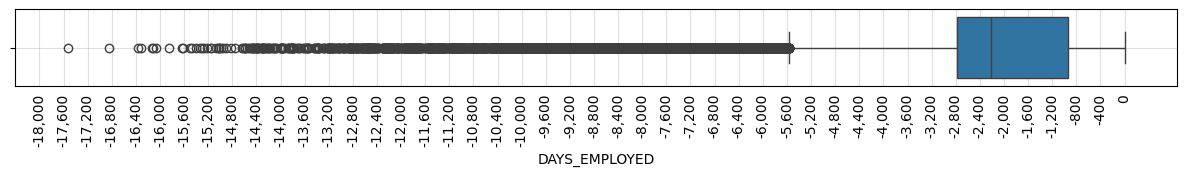

In [ ]:
data['DAYS_EMPLOYED'].replace(365243, -2446.0, inplace=True)
fig, axs =plt.subplots(1,1, figsize=(15,1))

sns.boxplot(x=data['DAYS_EMPLOYED'], ax=axs)
axs.set_xticks(list(np.arange(0,-18400, -400)))
axs.tick_params(axis='x', pad=5, length=0, labelrotation=90)
axs.grid(axis='y', alpha=0.4)
axs.grid(axis='x', alpha=0.4)
axs.set_axisbelow(True)
axs.xaxis.set_major_formatter(x_format)

In [ ]:
data[data['DAYS_EMPLOYED']<-15600]

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
264         0    Revolving loans           F            N               Y   
18729       0         Cash loans           F            N               Y   
18932       0         Cash loans           F            N               Y   
21768       0         Cash loans           M            Y               Y   
27064       0         Cash loans           F            N               Y   
28065       0         Cash loans           F            N               Y   
34193       0         Cash loans           F            N               Y   
35191       0         Cash loans           F            Y               Y   
39095       0         Cash loans           F            N               Y   
40449       0         Cash loans           F            N               Y   

       CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
264               0          225000.0    675000.0      33750.0   
18729             0          211500.0    922500.0      27103.5   
18932             0          405000.0    999000.0      36013.5   
21768             0          180000.0    144486.0       6493.5   
27064             0          112500.0    239850.0      23494.5   
28065             0          112500.0    454500.0      13828.5   
34193             0          103500.0    521280.0      22216.5   
35191             0          135000.0    284400.0      16011.0   
39095             0          112500.0     84577.5       8370.0   
40449             0          112500.0    299772.0      10894.5   

       AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
264           675000.0    Unaccompanied               Working   
18729         922500.0    Unaccompanied         State servant   
18932         999000.0    Unaccompanied         State servant   
21768         103500.0  Spouse, partner               Working   
27064         225000.0    Unaccompanied         State servant   
28065         454500.0    Unaccompanied               Working   
34193         450000.0    Unaccompanied               Working   
35191         225000.0    Unaccompanied               Working   
39095          76500.0    Unaccompanied  Commercial associate   
40449         247500.0    Unaccompanied               Working   

                 NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
264    Secondary / secondary special  Single / not married  House / apartment   
18729  Secondary / secondary special                 Widow  House / apartment   
18932               Higher education        Civil marriage  House / apartment   
21768  Secondary / secondary special               Married  House / apartment   
27064               Higher education                 Widow  House / apartment   
28065  Secondary / secondary special             Separated  House / apartment   
34193  Secondary / secondary special               Married  House / apartment   
35191  Secondary / secondary special                 Widow  House / apartment   
39095  Secondary / secondary special               Married  House / apartment   
40449  Secondary / secondary special                 Widow  House / apartment   

       REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
264                      0.008019      -22794         -15632   
18729                    0.007274      -22671         -15625   
18932                    0.072508      -23022         -16365   
21768                    0.031329      -22537         -15845   
27064                    0.025164      -24603         -16133   
28065                    0.030755      -23158         -16113   
34193                    0.018634      -23265         -16061   
35191                    0.020246      -24254         -17531   
39095                    0.046220      -23451         -16849   
40449                    0.008019      -23739         -16314   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
264                -7959            -4311     

In [ ]:
data2=pd.DataFrame()
data2['INCOME']=data[data['DAYS_EMPLOYED']<-15600]['AMT_INCOME_TOTAL']
data2['CREDIT%INCOME']=data[data['DAYS_EMPLOYED']<-15600]['AMT_CREDIT'].div(data[data['DAYS_EMPLOYED']<-15600]['AMT_INCOME_TOTAL']).multiply(100).round(3)
data2['ANNUITY%CREDIT']=data[data['DAYS_EMPLOYED']<-15600]['AMT_ANNUITY'].div(data[data['DAYS_EMPLOYED']<-15600]['AMT_CREDIT']).multiply(100).round(3)
data2['AGE']=data[data['DAYS_EMPLOYED']<-15600]['DAYS_BIRTH'].abs().div(365).round(3)
data2['YRS_EXP']=data[data['DAYS_EMPLOYED']<-15600]['DAYS_EMPLOYED'].abs().div(365).round(3)
data2

INCOME  CREDIT%INCOME  ANNUITY%CREDIT     AGE  YRS_EXP
264    225000.0        300.000           5.000  62.449   42.827
18729  211500.0        436.170           2.938  62.112   42.808
18932  405000.0        246.667           3.605  63.074   44.836
21768  180000.0         80.270           4.494  61.745   43.411
27064  112500.0        213.200           9.795  67.405   44.200
28065  112500.0        404.000           3.043  63.447   44.145
34193  103500.0        503.652           4.262  63.740   44.003
35191  135000.0        210.667           5.630  66.449   48.030
39095  112500.0         75.180           9.896  64.249   46.162
40449  112500.0        266.464           3.634  65.038   44.696

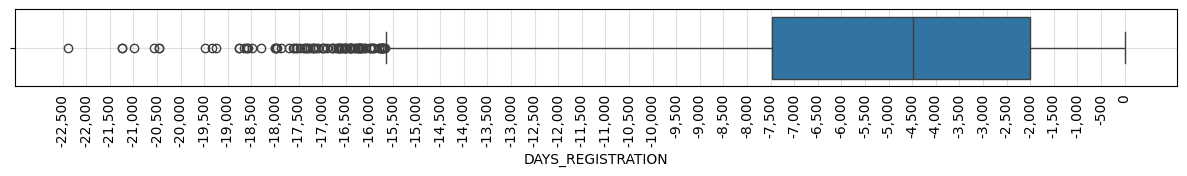

In [ ]:
fig, axs =plt.subplots(1,1, figsize=(15,1))

sns.boxplot(x=data['DAYS_REGISTRATION'], ax=axs)
axs.set_xticks(list(np.arange(0,-23000, -500)))
axs.tick_params(axis='x', pad=5, length=0, labelrotation=90)
axs.grid(axis='y', alpha=0.4)
axs.grid(axis='x', alpha=0.4)
axs.set_axisbelow(True)
axs.xaxis.set_major_formatter(x_format)

In [ ]:
data[data['DAYS_REGISTRATION']<-18000]

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
2680        0         Cash loans           F            N               N   
10300       0         Cash loans           F            N               Y   
19236       0         Cash loans           F            N               Y   
20555       0         Cash loans           F            N               Y   
21732       0         Cash loans           F            N               N   
21990       0         Cash loans           F            N               Y   
22927       0         Cash loans           F            N               Y   
24359       0         Cash loans           F            Y               Y   
24564       0         Cash loans           F            N               N   
27531       0         Cash loans           M            Y               Y   
33729       0         Cash loans           F            N               Y   
33939       0         Cash loans           F            N               Y   
34343       0         Cash loans           F            N               N   
39068       0         Cash loans           F            N               N   
41442       0         Cash loans           F            N               Y   
43581       0    Revolving loans           F            N               Y   
44824       0         Cash loans           M            N               N   
45121       0         Cash loans           F            N               N   
46590       0         Cash loans           M            Y               Y   

       CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
2680              0          135000.0    479700.0      49284.0   
10300             0          382500.0    247275.0      17716.5   
19236             0           90000.0    355320.0      34614.0   
20555             0          117000.0    808650.0      23773.5   
21732             0          117000.0   1125000.0      47664.0   
21990             0           39600.0    283585.5      17478.0   
22927             0          193500.0    491031.0      33075.0   
24359             0          112500.0    135000.0      13149.0   
24564             1          157500.0    271066.5      21105.0   
27531             0          405000.0   1345500.0      51246.0   
33729             0          157500.0    239850.0      23494.5   
33939             0          117000.0    728460.0      40806.0   
34343             0          166500.0    450000.0      44509.5   
39068             1           81000.0    269550.0      17820.0   
41442             0          135000.0   1125000.0      32895.0   
43581             0          112500.0    180000.0       9000.0   
44824             0          112500.0    609187.5      25807.5   
45121             0          112500.0    630000.0      25114.5   
46590             0          135000.0   1205896.5      35257.5   

       AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
2680          450000.0   Unaccompanied               Working   
10300         225000.0          Family             Pensioner   
19236         337500.0   Unaccompanied             Pensioner   
20555         675000.0   Unaccompanied             Pensioner   
21732        1125000.0   Unaccompanied         State servant   
21990         256500.0   Unaccompanied             Pensioner   
22927         463500.0   Unaccompanied  Commercial associate   
24359         135000.0   Unaccompanied             Pensioner   
24564         234000.0   Unaccompanied  Commercial associate   
27531        1345500.0   Unaccompanied               Working   
33729         225000.0   Unaccompanied             Pensioner   
33939         675000.0   Unaccompanied             Pensioner   
34343         450000.0   Unaccompanied               Working   
39068         225000.0   Unaccompanied  Commercial associate   
41442        1125000.0          Family               Working   
43581         180000.0          Family               Working   
44824         544500.0   Unaccompanied             Pensio

In [ ]:
data3=data[data['DAYS_REGISTRATION']<-18000][['DAYS_BIRTH', 'DAYS_REGISTRATION']]
data3['AGE']=data3['DAYS_BIRTH'].abs().div(365).round(3)
data3['REG']=data3['DAYS_REGISTRATION'].abs().div(365).round(3)
data3['DIFF']=data3['AGE']-data3['REG']
data3.drop(['DAYS_BIRTH', 'DAYS_REGISTRATION'], axis=1, inplace=True)
data3

AGE     REG    DIFF
2680   57.482  57.482   0.000
10300  67.633  51.400  16.233
19236  63.247  51.392  11.855
20555  59.474  52.997   6.477
21732  50.107  50.107   0.000
21990  60.877  58.203   2.674
22927  56.984  51.003   5.981
24359  67.852  51.123  16.729
24564  54.249  49.332   4.917
27531  56.036  56.033   0.003
33729  67.277  50.915  16.362
33939  64.677  56.019   8.658
34343  57.049  52.723   4.326
39068  50.704  50.677   0.027
41442  59.496  58.216   1.280
43581  54.625  53.392   1.233
44824  61.348  61.348   0.000
45121  56.359  56.359   0.000
46590  51.000  50.901   0.099

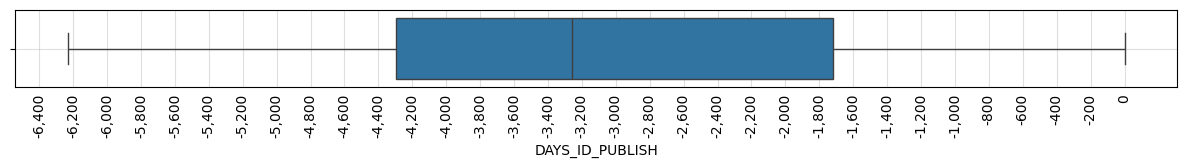

In [ ]:
fig, axs =plt.subplots(1,1, figsize=(15,1))

sns.boxplot(x=data['DAYS_ID_PUBLISH'], ax=axs)
axs.set_xticks(list(np.arange(0,-6500, -200)))
axs.tick_params(axis='x', pad=5, length=0, labelrotation=90)
axs.grid(axis='y', alpha=0.4)
axs.grid(axis='x', alpha=0.4)
axs.set_axisbelow(True)
axs.xaxis.set_major_formatter(x_format)

In [ ]:
round(data['DAYS_ID_PUBLISH'].abs().max()/365, 3)

17.074

In [ ]:
round(data['DAYS_ID_PUBLISH'].abs().min()/365, 3)

0.0

In [ ]:
any(data['DAYS_BIRTH'].abs().div(365) - data['DAYS_ID_PUBLISH'].abs().div(365))<0

False

In [ ]:
del [[data1, data2, data3]]
gc.collect()

55078

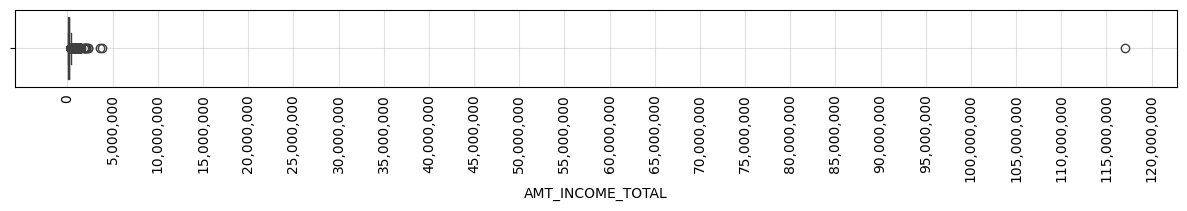

In [ ]:
fig, axs =plt.subplots(1,1, figsize=(15,1))

sns.boxplot(x=data['AMT_INCOME_TOTAL'], ax=axs)
axs.set_xticks(list(np.arange(0,125000000,5000000)))
axs.tick_params(axis='x', pad=5, length=0, labelrotation=90)
axs.grid(axis='y', alpha=0.4)
axs.grid(axis='x', alpha=0.4)
axs.set_axisbelow(True)
axs.xaxis.set_major_formatter(x_format)

fig.tight_layout()
plt.show()

In [ ]:
data1=data.copy()
data1['ANNUITY%INCOME']=data1['AMT_ANNUITY'].div(data1['AMT_INCOME_TOTAL']).multiply(100).round(3)
data1['CREDIT%INCOME']=data1['AMT_CREDIT'].div(data1['AMT_INCOME_TOTAL']).multiply(100).round(3)
data1['AGE']=data1['DAYS_BIRTH'].div(365).abs()
data1['EXP_YRS']=data1['DAYS_EMPLOYED'].div(365).abs()
data1['CREDIT%GOODS']=data1['AMT_CREDIT'].div(data1['AMT_GOODS_PRICE']).multiply(100).round(3)
data1[data1['AMT_INCOME_TOTAL']>5000000][['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'ANNUITY%INCOME', 'CREDIT%INCOME', 'AGE', 'EXP_YRS']]

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_GOODS_PRICE  AMT_ANNUITY  \
12840       117000000.0    562491.0         454500.0      26194.5   

       ANNUITY%INCOME  CREDIT%INCOME        AGE   EXP_YRS  
12840           0.022          0.481  34.561644  2.526027

In [ ]:
data1['ANNUITY%INCOME'].median()

16.308

In [ ]:
data1['CREDIT%INCOME'].median()

328.836

In [ ]:
data1['AGE'].median()

43.0986301369863

In [ ]:
data1['EXP_YRS'].median()

6.071232876712329

In [ ]:
data1[~(data1['AMT_INCOME_TOTAL']>5000000)]['AMT_INCOME_TOTAL'].median()

145800.0

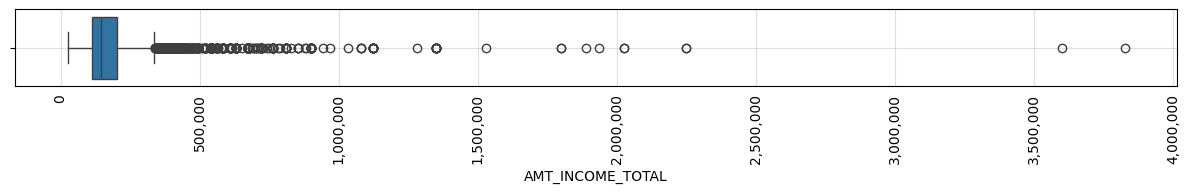

In [ ]:
data['AMT_INCOME_TOTAL'].replace(117000000.0, 145800.0, inplace=True)
fig, axs =plt.subplots(1,1, figsize=(15,1))

sns.boxplot(x=data['AMT_INCOME_TOTAL'], ax=axs)
#axs.set_xticks(list(np.arange(0,125000000,5000000)))
axs.tick_params(axis='x', pad=5, length=0, labelrotation=90)
axs.grid(axis='y', alpha=0.4)
axs.grid(axis='x', alpha=0.4)
axs.set_axisbelow(True)
axs.xaxis.set_major_formatter(x_format)

fig.tight_layout()
plt.show()

In [ ]:
data1[data1['AMT_INCOME_TOTAL']>1000000][['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'ANNUITY%INCOME', 'CREDIT%INCOME', 'AGE', 'EXP_YRS']]


AMT_INCOME_TOTAL  AMT_CREDIT  AMT_GOODS_PRICE  AMT_ANNUITY  \
1504          1080000.0    180000.0         180000.0       9000.0   
1723          1935000.0    269550.0         225000.0      10534.5   
3371          1350000.0   2410380.0        2250000.0     109053.0   
4603          1350000.0    405000.0         405000.0      20250.0   
7061          1035000.0   2695500.0        2250000.0      74254.5   
8314          1350000.0    427450.5         369000.0      18238.5   
10222         2250000.0    900000.0         900000.0      45000.0   
11068         1350000.0    835380.0         675000.0      40189.5   
11344         1125000.0    701730.0         675000.0      72036.0   
12005         1125000.0    848308.5         765000.0      63427.5   
12108         1080000.0   2250000.0        2250000.0     225000.0   
12840       117000000.0    562491.0         454500.0      26194.5   
14048         1125000.0    936000.0         936000.0      30325.5   
16998         1125000.0    675000.0         675000.0      33750.0   
17721         1800000.0   1125000.0        1125000.0      36423.0   
19665         1350000.0   1030680.0         900000.0      65866.5   
19995         1125000.0    360000.0         360000.0      17509.5   
20216         3825000.0   1241023.5        1206000.0     117369.0   
22897         1125000.0   2013840.0        1800000.0      53253.0   
23975         1800000.0   1350000.0        1350000.0      67500.0   
24531         1350000.0    585000.0         585000.0      29250.0   
24741         1282500.0   1095111.0        1035000.0      58477.5   
25626         1350000.0    675000.0         675000.0      33750.0   
29286         1350000.0    305221.5         252000.0      15633.0   
29647         1125000.0   1379376.0        1080000.0      40459.5   
29737         2250000.0   1350000.0        1350000.0      67500.0   
30514         1080000.0    675000.0         675000.0      33750.0   
32771         1125000.0   1024740.0         900000.0      52452.0   
33485         1125000.0    640080.0         450000.0      31261.5   
35572         2025000.0    733315.5         679500.0      41076.0   
36689         1350000.0   2250000.0        2250000.0      59355.0   
38271         1125000.0   1006920.0         900000.0      40063.5   
39611         2025000.0   1190340.0        1125000.0      63549.0   
41725         1890000.0    781920.0         675000.0      61906.5   
43634         1125000.0   1125000.0        1125000.0      47794.5   
44571         1530000.0    900000.0         900000.0      45000.0   
45277         1125000.0   1218555.0        1125000.0      84937.5   
46309         1350000.0    225000.0         225000.0      11250.0   
49342         1125000.0   1885536.0        1800000.0      97632.0   
49645         3600000.0    953460.0         900000.0      68791.5   

       ANNUITY%INCOME  CREDIT%INCOME        AGE    EXP_YRS  
1504            0.833         16.667  37.350685  15.167123  
1723            0.544         13.930  51.057534   6.701370  
3371            8.078        178.547  33.460274   2.309589  
4603            1.500         30.000  40.495890  13.063014  
7061            7.174        260.435  29.783562   1.342466  
8314            1.351         31.663  53.443836   4.295890  
10222           2.000         40.000  35.400000  10.205479  
11068           2.977         61.880  38.484932   2.843836  
11344           6.403         62.376  43.726027   4.509589  
12005           5.638         75.405  30.010959   2.953425  
12108          20.833        208.333  41.980822  17.208219  
12840           0.022          0.481  34.561644   2.526027  
14048           2.696         83.200  32.498630   5.243836  
16998           3.000         60.000  35.298630  16.917808  
17721           2.023         62.500  39.410959  13.112329  
19665           4.879         76.347  45.843836   5.805479  
19995           1.556         32.000  29.630137   2.060274  
20216           3.068         32.445  50.564384   3.000000  
22897           4.

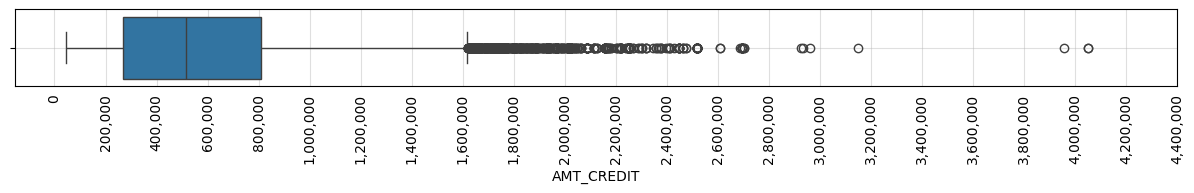

In [ ]:
fig, axs =plt.subplots(1,1, figsize=(15,1))

sns.boxplot(x=data['AMT_CREDIT'], ax=axs)
axs.set_xticks(list(np.arange(0,4500000,200000)))
axs.tick_params(axis='x', pad=5, length=0, labelrotation=90)
axs.grid(axis='y', alpha=0.4)
axs.grid(axis='x', alpha=0.4)
axs.set_axisbelow(True)
axs.xaxis.set_major_formatter(x_format)

fig.tight_layout()
plt.show()

In [ ]:
data1[data1['AMT_CREDIT']>2600000][['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'ANNUITY%INCOME', 'CREDIT%INCOME', 'CREDIT%GOODS', 'AGE', 'EXP_YRS']]

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_GOODS_PRICE  AMT_ANNUITY  \
7061          1035000.0   2695500.0        2250000.0      74254.5   
7642           382500.0   2925000.0        2925000.0      73944.0   
8103           234000.0   2695500.0        2250000.0      77382.0   
8189           472500.0   2606400.0        2250000.0      79155.0   
8940           315000.0   2961000.0        2961000.0     105511.5   
14643          749331.0   3956274.0        3825000.0     197230.5   
14852          760846.5   4050000.0        4050000.0     146002.5   
17948          783000.0   4050000.0        4050000.0     258025.5   
20513          616500.0   2695500.0        2250000.0      71235.0   
22321          450000.0   2695500.0        2250000.0      71235.0   
23949          450000.0   2695500.0        2250000.0      74254.5   
25447          450225.0   2687355.0        2475000.0      68062.5   
27666          180000.0   2606400.0        2250000.0      79155.0   
32099          337500.0   3150000.0        3150000.0      79632.0   
32197          562500.0   2695500.0        2250000.0      74124.0   
45640          190611.0   2931660.0        2700000.0      74110.5   
46250          225000.0   2695500.0        2250000.0      74254.5   
47329          277177.5   2700000.0        2700000.0      66798.0   
48690          225117.0   2700000.0        2700000.0      66798.0   
49236          292500.0   2695500.0        2250000.0      71235.0   

       ANNUITY%INCOME  CREDIT%INCOME  CREDIT%GOODS        AGE    EXP_YRS  
7061            7.174        260.435       119.800  29.783562   1.342466  
7642           19.332        764.706       100.000  43.156164   2.556164  
8103           33.069       1151.923       119.800  55.997260   0.731507  
8189           16.752        551.619       115.840  46.021918  21.810959  
8940           33.496        940.000       100.000  61.600000   3.958904  
14643          26.321        527.974       103.432  52.495890   2.709589  
14852          19.189        532.302       100.000  35.057534   3.758904  
17948          32.953        517.241       100.000  41.578082   0.550685  
20513          11.555        437.226       119.800  54.126027  33.463014  
22321          15.830        599.000       119.800  45.547945  15.263014  
23949          16.501        599.000       119.800  31.608219   2.964384  
25447          15.117        596.892       108.580  39.589041   5.095890  
27666          43.975       1448.000       115.840  45.734247  10.339726  
32099          23.595        933.333       100.000  43.402740   0.942466  
32197          13.178        479.200       119.800  61.049315   4.224658  
45640          38.880       1538.033       108.580  32.232877   3.378082  
46250          33.002       1198.000       119.800  32.715068  10.164384  
47329          24.099        974.105       100.000  46.723288   3.923288  
48690          29.673       1199.376       100.000  38.487671   0.561644  
49236          24.354        921.538       119.800  48.271233   2.808219

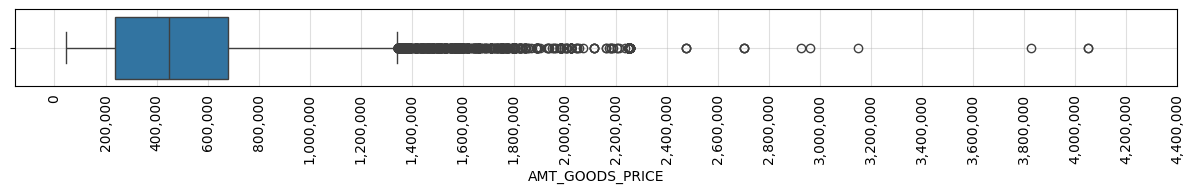

In [ ]:
fig, axs =plt.subplots(1,1, figsize=(15,1))

sns.boxplot(x=data['AMT_GOODS_PRICE'], ax=axs)
axs.set_xticks(list(np.arange(0,4500000,200000)))
axs.tick_params(axis='x', pad=5, length=0, labelrotation=90)
axs.grid(axis='y', alpha=0.4)
axs.grid(axis='x', alpha=0.4)
axs.set_axisbelow(True)
axs.xaxis.set_major_formatter(x_format)

fig.tight_layout()
plt.show()

In [ ]:
data1[data1['AMT_GOODS_PRICE']>2400000][['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'ANNUITY%INCOME', 'CREDIT%INCOME', 'CREDIT%GOODS', 'AGE', 'EXP_YRS']]

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_GOODS_PRICE  AMT_ANNUITY  \
7642           382500.0   2925000.0        2925000.0      73944.0   
8940           315000.0   2961000.0        2961000.0     105511.5   
14643          749331.0   3956274.0        3825000.0     197230.5   
14852          760846.5   4050000.0        4050000.0     146002.5   
16230          239998.5   2475000.0        2475000.0      62568.0   
17948          783000.0   4050000.0        4050000.0     258025.5   
25447          450225.0   2687355.0        2475000.0      68062.5   
25629          263250.0   2475000.0        2475000.0      62698.5   
32099          337500.0   3150000.0        3150000.0      79632.0   
45640          190611.0   2931660.0        2700000.0      74110.5   
47329          277177.5   2700000.0        2700000.0      66798.0   
48690          225117.0   2700000.0        2700000.0      66798.0   

       ANNUITY%INCOME  CREDIT%INCOME  CREDIT%GOODS        AGE   EXP_YRS  
7642           19.332        764.706       100.000  43.156164  2.556164  
8940           33.496        940.000       100.000  61.600000  3.958904  
14643          26.321        527.974       103.432  52.495890  2.709589  
14852          19.189        532.302       100.000  35.057534  3.758904  
16230          26.070       1031.256       100.000  28.010959  0.605479  
17948          32.953        517.241       100.000  41.578082  0.550685  
25447          15.117        596.892       108.580  39.589041  5.095890  
25629          23.817        940.171       100.000  32.605479  0.298630  
32099          23.595        933.333       100.000  43.402740  0.942466  
45640          38.880       1538.033       108.580  32.232877  3.378082  
47329          24.099        974.105       100.000  46.723288  3.923288  
48690          29.673       1199.376       100.000  38.487671  0.561644

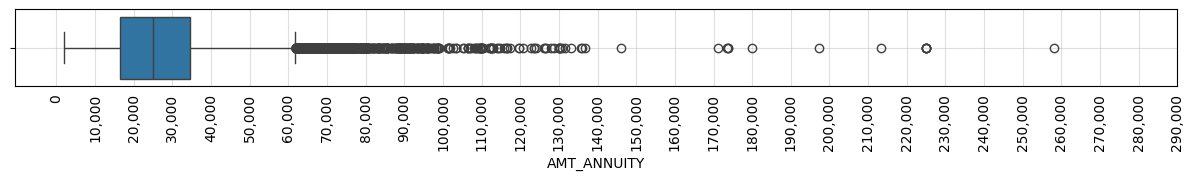

In [ ]:
fig, axs =plt.subplots(1,1, figsize=(15,1))

sns.boxplot(x=data['AMT_ANNUITY'], ax=axs)
axs.set_xticks(list(np.arange(0,300000,10000)))
axs.tick_params(axis='x', pad=5, length=0, labelrotation=90)
axs.grid(axis='y', alpha=0.4)
axs.grid(axis='x', alpha=0.4)
axs.set_axisbelow(True)
axs.xaxis.set_major_formatter(x_format)

fig.tight_layout()
plt.show()

In [ ]:
data1[data1['AMT_ANNUITY']>140000][['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'ANNUITY%INCOME', 'CREDIT%INCOME', 'CREDIT%GOODS', 'AGE', 'EXP_YRS']]

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_GOODS_PRICE  AMT_ANNUITY  \
12108         1080000.0   2250000.0        2250000.0     225000.0   
14643          749331.0   3956274.0        3825000.0     197230.5   
14852          760846.5   4050000.0        4050000.0     146002.5   
15501          270000.0   2250000.0        2250000.0     225000.0   
17948          783000.0   4050000.0        4050000.0     258025.5   
20119          675000.0   2250000.0        2250000.0     225000.0   
20338          540000.0   2303460.0        2250000.0     213291.0   
23556          900000.0   1800000.0        1800000.0     171040.5   
23582          675000.0   2250000.0        2250000.0     225000.0   
24428          585000.0   1800000.0        1800000.0     173704.5   
32100          405000.0   2250000.0        2250000.0     225000.0   
34471          270000.0   1800000.0        1800000.0     173704.5   
41874          225000.0   1800000.0        1800000.0     173574.0   
45419          450000.0   1800000.0        1800000.0     180000.0   

       ANNUITY%INCOME  CREDIT%INCOME  CREDIT%GOODS        AGE    EXP_YRS  
12108          20.833        208.333       100.000  41.980822  17.208219  
14643          26.321        527.974       103.432  52.495890   2.709589  
14852          19.189        532.302       100.000  35.057534   3.758904  
15501          83.333        833.333       100.000  53.895890  34.561644  
17948          32.953        517.241       100.000  41.578082   0.550685  
20119          33.333        333.333       100.000  43.846575   2.178082  
20338          39.498        426.567       102.376  37.824658  14.547945  
23556          19.004        200.000       100.000  40.435616   4.613699  
23582          33.333        333.333       100.000  57.643836   6.104110  
24428          29.693        307.692       100.000  36.556164   8.326027  
32100          55.556        555.556       100.000  30.917808   6.871233  
34471          64.335        666.667       100.000  33.361644   9.610959  
41874          77.144        800.000       100.000  47.742466  11.298630  
45419          40.000        400.000       100.000  44.484932   4.657534

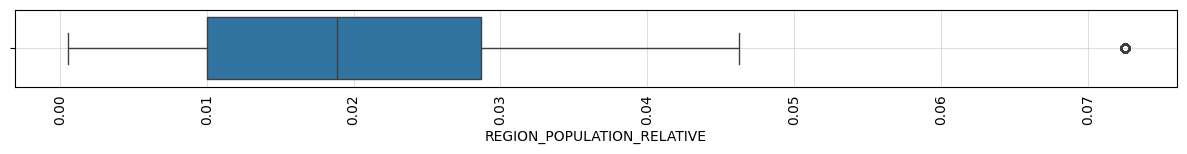

In [ ]:
fig, axs =plt.subplots(1,1, figsize=(15,1))
sns.boxplot(data['REGION_POPULATION_RELATIVE'], orient='h', ax=axs)
axs.tick_params(axis='x', pad=5, length=0, labelrotation=90)
axs.grid(axis='y', alpha=0.4)
axs.grid(axis='x', alpha=0.4)
axs.set_axisbelow(True)
plt.show()

In [ ]:
data1[data1['REGION_POPULATION_RELATIVE']>0.05]

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
del [[data1]]
gc.collect()

33879

In [ ]:
data['AGE']=data['DAYS_BIRTH'].abs().div(365).round(3)
data['YRS_EXP']=data['DAYS_EMPLOYED'].abs().div(365).round(3)
data['YRS_REG_CNG']=data['DAYS_REGISTRATION'].abs().div(365).round(3)
data['YRS_ID_CNG']=data['DAYS_ID_PUBLISH'].abs().div(365).round(3)
data.drop(['DAYS_BIRTH','DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH'], axis=1, inplace=True)
data['CREDIT%INCOME']=data['AMT_CREDIT'].div(data['AMT_INCOME_TOTAL']).multiply(100).round(3)
data['ANNUITY%INCOME']=data['AMT_ANNUITY'].div(data['AMT_INCOME_TOTAL']).multiply(100).round(3)
data['ANNUITY%CREDIT']=data['AMT_ANNUITY'].div(data['AMT_CREDIT']).multiply(100).round(3)
data['CREDIT%GOODS_PRICE']=data['AMT_CREDIT'].div(data['AMT_GOODS_PRICE']).multiply(100).round(3)

In [ ]:
data.head()

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0       1         Cash loans           M            N               Y   
1       0         Cash loans           F            N               N   
2       0    Revolving loans           M            Y               Y   
3       0         Cash loans           F            N               Y   
4       0         Cash loans           M            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working  Secondary / secondary special   
1          Family    State servant               Higher education   
2   Unaccompanied          Working  Secondary / secondary special   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           1   
1           1               1                0                 1           1   
2           1               1                1                 1           1   
3           1               1                0                 1           0   
4           1               1                0                 1           0   

   FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS WEEKDAY_APPR_PROCESS_START  \
0           0        Laborers              1.0                  WEDNESDAY   
1           0      Core staff              2.0                     MONDAY   
2           0        Laborers              1.0                     MONDAY   
3           0        Laborers              2.0                  WEDNESDAY   
4           0      Core staff              1.0                   THURSDAY   

   HOUR_APPR_PROCESS_START       ORGANIZATION_TYPE     AGE  YRS_EXP  \
0                       10  Business Entity Type 3  25.921    1.745   
1                       11                  School  45.932    3.255   
2                        9              Government  52.181    0.616   
3                       17  Business Entity Type 3  52.068    8.326   
4                       11                Religion  54.608    8.323   

   YRS_REG_CNG  YRS_ID_CNG  CREDIT%INCOME  ANNUITY%INCOME  ANNUITY%CREDIT  \
0        9.995       5.808        200.789          12.198           6.075   
1        3.249       0.797        479.075          13.222           2.760   
2       11.671       6.934        200.000          10.000           5.000   
3       26.940       6.677        231.617          21.990           9.494   
4       11.811       9.474        422.222          17.996           4.262   

   CREDIT%GOODS_PRICE  
0              115.84  
1              114.52  
2              100.00  
3              105.28  
4              100.00

In [ ]:
data[data['AGE']<data['YRS_EXP']]

Empty DataFrame
Columns: [TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, ORGANIZATION_TYPE, AGE, YRS_EXP, YRS_REG_CNG, YRS_ID_CNG, CREDIT%INCOME, ANNUITY%INCOME, ANNUITY%CREDIT, CREDIT%GOODS_PRICE]
Index: []

In [ ]:
data[data['AGE']<data['YRS_REG_CNG']]

Empty DataFrame
Columns: [TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, ORGANIZATION_TYPE, AGE, YRS_EXP, YRS_REG_CNG, YRS_ID_CNG, CREDIT%INCOME, ANNUITY%INCOME, ANNUITY%CREDIT, CREDIT%GOODS_PRICE]
Index: []

In [ ]:
data[data['AGE']<data['YRS_ID_CNG']]

Empty DataFrame
Columns: [TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, ORGANIZATION_TYPE, AGE, YRS_EXP, YRS_REG_CNG, YRS_ID_CNG, CREDIT%INCOME, ANNUITY%INCOME, ANNUITY%CREDIT, CREDIT%GOODS_PRICE]
Index: []

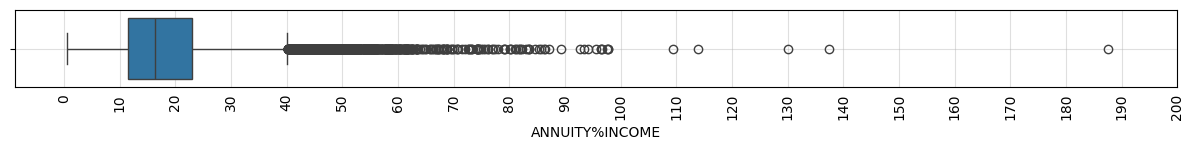

In [ ]:
fig, axs =plt.subplots(1,1, figsize=(15,1))
sns.boxplot(data['ANNUITY%INCOME'], orient='h', ax=axs)
axs.set_xticks(list(np.arange(0,210,10)))
axs.tick_params(axis='x', pad=5, length=0, labelrotation=90)
axs.grid(axis='y', alpha=0.4)
axs.grid(axis='x', alpha=0.4)
axs.set_axisbelow(True)
plt.show()

In [ ]:
data1=data[data['ANNUITY%INCOME']>=65]
data1['CNT_FAM_MEMBERS'].value_counts()

CNT_FAM_MEMBERS
2.0    72
3.0    13
4.0     5
1.0     3
Name: count, dtype: int64

In [ ]:
data1['NAME_INCOME_TYPE'].value_counts()

NAME_INCOME_TYPE
Pensioner               50
Working                 23
Commercial associate    12
State servant            6
Unemployed               2
Name: count, dtype: int64

In [ ]:
data1['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Laborers                 57
Core staff                8
Sales staff               6
Waiters/barmen staff      6
Security staff            3
Medicine staff            3
Drivers                   3
Accountants               2
Managers                  2
Secretaries               1
High skill tech staff     1
Private service staff     1
Name: count, dtype: int64

100%|██████████| 93/93 [00:00<00:00, 241.37it/s]


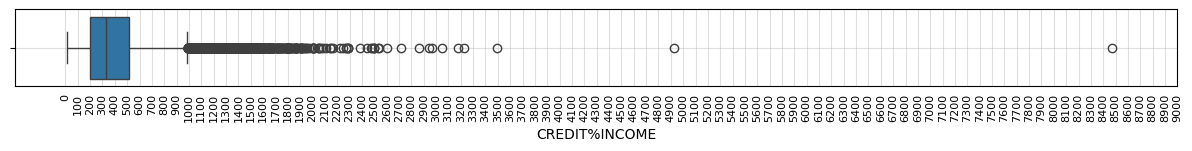

In [ ]:
from tqdm import tqdm
data2=data[~(data['ANNUITY%INCOME']>=65)]
for i in tqdm(data1.index):
  ait=data1['AMT_INCOME_TOTAL'].loc[i]
  ul=ait+5000
  ll=ait-5000
  data['AMT_ANNUITY'].loc[i]=data2[(data2['AMT_INCOME_TOTAL']>=ll) & (data2['AMT_INCOME_TOTAL']<ul)]['AMT_ANNUITY'].median()
fig, axs =plt.subplots(1,1, figsize=(15,1))
sns.boxplot(data['CREDIT%INCOME'], orient='h', ax=axs)
axs.set_xticks(list(np.arange(0,9001,100)))
axs.tick_params(axis='x', pad=5, length=0, labelrotation=90, labelsize=8)
axs.grid(axis='y', alpha=0.4)
axs.grid(axis='x', alpha=0.4)
axs.set_axisbelow(True)
plt.show()

In [ ]:
data1=data[data['CREDIT%INCOME']>2000]
data1['CNT_FAM_MEMBERS'].value_counts()

CNT_FAM_MEMBERS
2.0    32
1.0     3
3.0     2
4.0     1
Name: count, dtype: int64

In [ ]:
data1['NAME_INCOME_TYPE'].value_counts()

NAME_INCOME_TYPE
Pensioner        30
Working           5
State servant     2
Unemployed        1
Name: count, dtype: int64

In [ ]:
data1['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Laborers          32
Medicine staff     2
Security staff     1
Core staff         1
Managers           1
Sales staff        1
Name: count, dtype: int64

In [ ]:
data2=data[~(data['CREDIT%INCOME']>2000)]
for i in tqdm(data1.index):
  ait=data1['AMT_INCOME_TOTAL'].loc[i]
  ul=ait+5000
  ll=ait-5000
  data['AMT_CREDIT'].loc[i]=data2[(data2['AMT_INCOME_TOTAL']>=ll) & (data2['AMT_INCOME_TOTAL']<ul)]['AMT_CREDIT'].median()

100%|██████████| 38/38 [00:00<00:00, 380.60it/s]


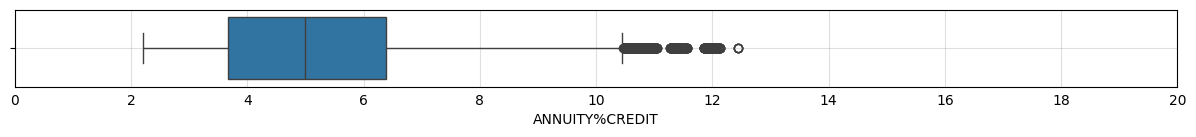

In [ ]:
fig, axs =plt.subplots(1,1, figsize=(15,1))
sns.boxplot(data['ANNUITY%CREDIT'], orient='h', ax=axs)
axs.set_xticks(list(np.arange(0,21,2)))
axs.tick_params(axis='x', pad=5, length=0)
axs.grid(axis='y', alpha=0.4)
axs.grid(axis='x', alpha=0.4)
axs.set_axisbelow(True)
plt.show()

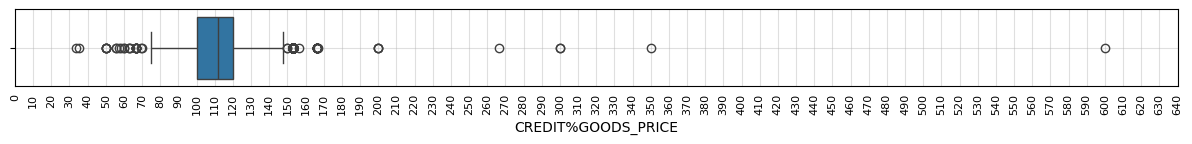

In [ ]:
fig, axs =plt.subplots(1,1, figsize=(15,1))
sns.boxplot(data['CREDIT%GOODS_PRICE'], orient='h', ax=axs)
axs.set_xticks(list(np.arange(0,650,10)))
axs.tick_params(axis='x', pad=5, length=0, labelrotation=90, labelsize=8)
axs.grid(axis='y', alpha=0.4)
axs.grid(axis='x', alpha=0.4)
axs.set_axisbelow(True)
plt.show()

In [ ]:
data[data['CREDIT%GOODS_PRICE']>=150].sort_values('AGE', ascending=False)

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
27817       0         Cash loans           F            N               Y   
20093       0         Cash loans           F            N               Y   
25687       0         Cash loans           M            N               N   
48107       0         Cash loans           F            N               Y   
13519       1         Cash loans           F            N               Y   
3633        0         Cash loans           M            N               N   
21488       1         Cash loans           F            N               Y   
10054       0         Cash loans           F            N               Y   
39631       0         Cash loans           M            N               Y   
23429       0         Cash loans           F            N               Y   
38882       0         Cash loans           F            N               Y   
35726       0         Cash loans           M            Y               Y   
48048       0         Cash loans           F            N               N   
46128       0         Cash loans           F            N               Y   
10086       0         Cash loans           F            N               Y   
34530       0         Cash loans           M            N               Y   
20325       0         Cash loans           F            N               Y   
43222       0         Cash loans           M            Y               Y   
36691       0         Cash loans           F            N               Y   
33062       0         Cash loans           M            N               N   
19535       0         Cash loans           M            Y               Y   
3155        0         Cash loans           F            N               Y   
9916        0         Cash loans           F            N               Y   
36776       0         Cash loans           M            Y               N   
5846        0    Revolving loans           F            N               Y   
27896       1         Cash loans           F            N               Y   
4365        0         Cash loans           F            Y               Y   
23443       0         Cash loans           F            N               Y   
21151       0         Cash loans           F            N               N   
4306        0         Cash loans           F            N               Y   
49137       0         Cash loans           F            N               Y   
36377       0         Cash loans           F            N               N   
27434       0         Cash loans           F            N               Y   
45659       0         Cash loans           F            N               Y   
25918       0         Cash loans           F            N               Y   
7870        0         Cash loans           M            Y               Y   
38807       0         Cash loans           F            Y               Y   
32702       0         Cash loans           M            Y               Y   
22270       0         Cash loans           F            N               Y   
6391        0         Cash loans           F            N               Y   
44762       0         Cash loans           F            N               Y   
26167       0         Cash loans           M            Y               Y   
13821       0         Cash loans           F            N               Y   
43379       0         Cash loans           F            N               Y   
40509       0         Cash loans           F            N               Y   
9189        0         Cash loans           F            N               Y   
20773       0         Cash loans           F            N               N   
44398       0         Cash loans           F            N               N   
39328       0         Cash loans           F            N               Y   
28384       0         Cash loans           F            Y               Y   
22990       0         Cash loans           F            N               Y   
451

In [ ]:
idx=data1[data1['CREDIT%GOODS_PRICE']>=150].index
for i in idx:
    data['AMT_CREDIT'].loc[i]=data['AMT_GOODS_PRICE'].loc[i]
del [[data1, data2]]
gc.collect()

31602

In [ ]:
data.head()

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0       1         Cash loans           M            N               Y   
1       0         Cash loans           F            N               N   
2       0    Revolving loans           M            Y               Y   
3       0         Cash loans           F            N               Y   
4       0         Cash loans           M            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working  Secondary / secondary special   
1          Family    State servant               Higher education   
2   Unaccompanied          Working  Secondary / secondary special   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           1   
1           1               1                0                 1           1   
2           1               1                1                 1           1   
3           1               1                0                 1           0   
4           1               1                0                 1           0   

   FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS WEEKDAY_APPR_PROCESS_START  \
0           0        Laborers              1.0                  WEDNESDAY   
1           0      Core staff              2.0                     MONDAY   
2           0        Laborers              1.0                     MONDAY   
3           0        Laborers              2.0                  WEDNESDAY   
4           0      Core staff              1.0                   THURSDAY   

   HOUR_APPR_PROCESS_START       ORGANIZATION_TYPE     AGE  YRS_EXP  \
0                       10  Business Entity Type 3  25.921    1.745   
1                       11                  School  45.932    3.255   
2                        9              Government  52.181    0.616   
3                       17  Business Entity Type 3  52.068    8.326   
4                       11                Religion  54.608    8.323   

   YRS_REG_CNG  YRS_ID_CNG  CREDIT%INCOME  ANNUITY%INCOME  ANNUITY%CREDIT  \
0        9.995       5.808        200.789          12.198           6.075   
1        3.249       0.797        479.075          13.222           2.760   
2       11.671       6.934        200.000          10.000           5.000   
3       26.940       6.677        231.617          21.990           9.494   
4       11.811       9.474        422.222          17.996           4.262   

   CREDIT%GOODS_PRICE  
0              115.84  
1              114.52  
2              100.00  
3              105.28  
4              100.00

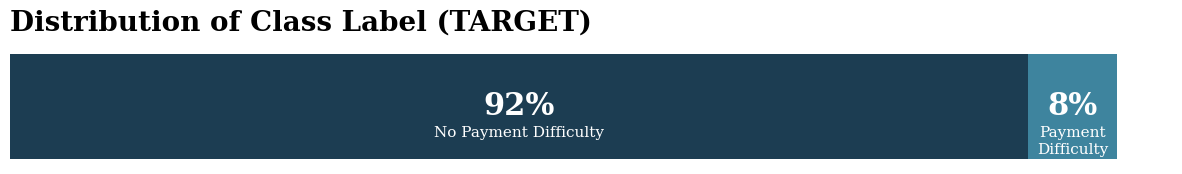

In [ ]:
l=['CNT_FAM_MEMBERS']
data[l]=data[l].astype(int)
dfc_tar=pd.DataFrame(data['TARGET'].value_counts()).T
zero=dfc_tar[0].values[0]
one=dfc_tar[1].values[0]

fig, ax = plt.subplots(1,1,figsize=(15, 1.5))

ax.barh(dfc_tar.index, dfc_tar[0].values, color='#1C3D52')
ax.barh(dfc_tar.index, dfc_tar[1].values, left = dfc_tar[0].values, color='#3E849E')

ax.annotate('{:.0f}%'.format((zero*100)/(zero+one)),xy=(zero/2,0), va='center', ha='center', fontfamily='serif', fontsize=22, fontweight=600, color='white')
ax.annotate('{:.0f}%'.format((one*100)/(zero+one)),xy= (zero+one/2,0), va='center', ha='center', fontfamily='serif', fontsize=22, fontweight=600, color='white')
ax.annotate('No Payment Difficulty',xy=(zero/2,-0.2), va='center', ha='center', fontfamily='serif', fontsize=11, fontweight=500, color='white')
ax.annotate('Payment',xy= (zero+one/2,-0.2), va='center', ha='center', fontfamily='serif', fontsize=11, fontweight=500, color='white')
ax.annotate('Difficulty',xy= (zero+one/2,-0.33), va='center', ha='center', fontfamily='serif', fontsize=11, fontweight=500, color='white')

#Remove all the ticks in both the axis
ax.set_xticks([])
ax.set_yticks([])

#Remove the axis lines on all four sides
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
fig.text(0.125, 1.0, "Distribution of Class Label (TARGET)", fontfamily='serif', fontsize=20, fontweight=600, color='black')

plt.show()


In [ ]:
data.head()

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0       1         Cash loans           M            N               Y   
1       0         Cash loans           F            N               N   
2       0    Revolving loans           M            Y               Y   
3       0         Cash loans           F            N               Y   
4       0         Cash loans           M            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working  Secondary / secondary special   
1          Family    State servant               Higher education   
2   Unaccompanied          Working  Secondary / secondary special   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           1   
1           1               1                0                 1           1   
2           1               1                1                 1           1   
3           1               1                0                 1           0   
4           1               1                0                 1           0   

   FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS WEEKDAY_APPR_PROCESS_START  \
0           0        Laborers                1                  WEDNESDAY   
1           0      Core staff                2                     MONDAY   
2           0        Laborers                1                     MONDAY   
3           0        Laborers                2                  WEDNESDAY   
4           0      Core staff                1                   THURSDAY   

   HOUR_APPR_PROCESS_START       ORGANIZATION_TYPE     AGE  YRS_EXP  \
0                       10  Business Entity Type 3  25.921    1.745   
1                       11                  School  45.932    3.255   
2                        9              Government  52.181    0.616   
3                       17  Business Entity Type 3  52.068    8.326   
4                       11                Religion  54.608    8.323   

   YRS_REG_CNG  YRS_ID_CNG  CREDIT%INCOME  ANNUITY%INCOME  ANNUITY%CREDIT  \
0        9.995       5.808        200.789          12.198           6.075   
1        3.249       0.797        479.075          13.222           2.760   
2       11.671       6.934        200.000          10.000           5.000   
3       26.940       6.677        231.617          21.990           9.494   
4       11.811       9.474        422.222          17.996           4.262   

   CREDIT%GOODS_PRICE  
0              115.84  
1              114.52  
2              100.00  
3              105.28  
4              100.00

              TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
count   49999.000000              49999       49999        49999   
unique           NaN                  2           2            2   
top              NaN         Cash loans           F            N   
freq             NaN              45276       32825        32949   
mean        0.080522                NaN         NaN          NaN   
std         0.272102                NaN         NaN          NaN   
min         0.000000                NaN         NaN          NaN   
25%         0.000000                NaN         NaN          NaN   
50%         0.000000                NaN         NaN          NaN   
75%         0.000000                NaN         NaN          NaN   
max         1.000000                NaN         NaN          NaN   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count            49999  49999.000000      4.999900e+04  4.999900e+04   
unique               2           NaN   

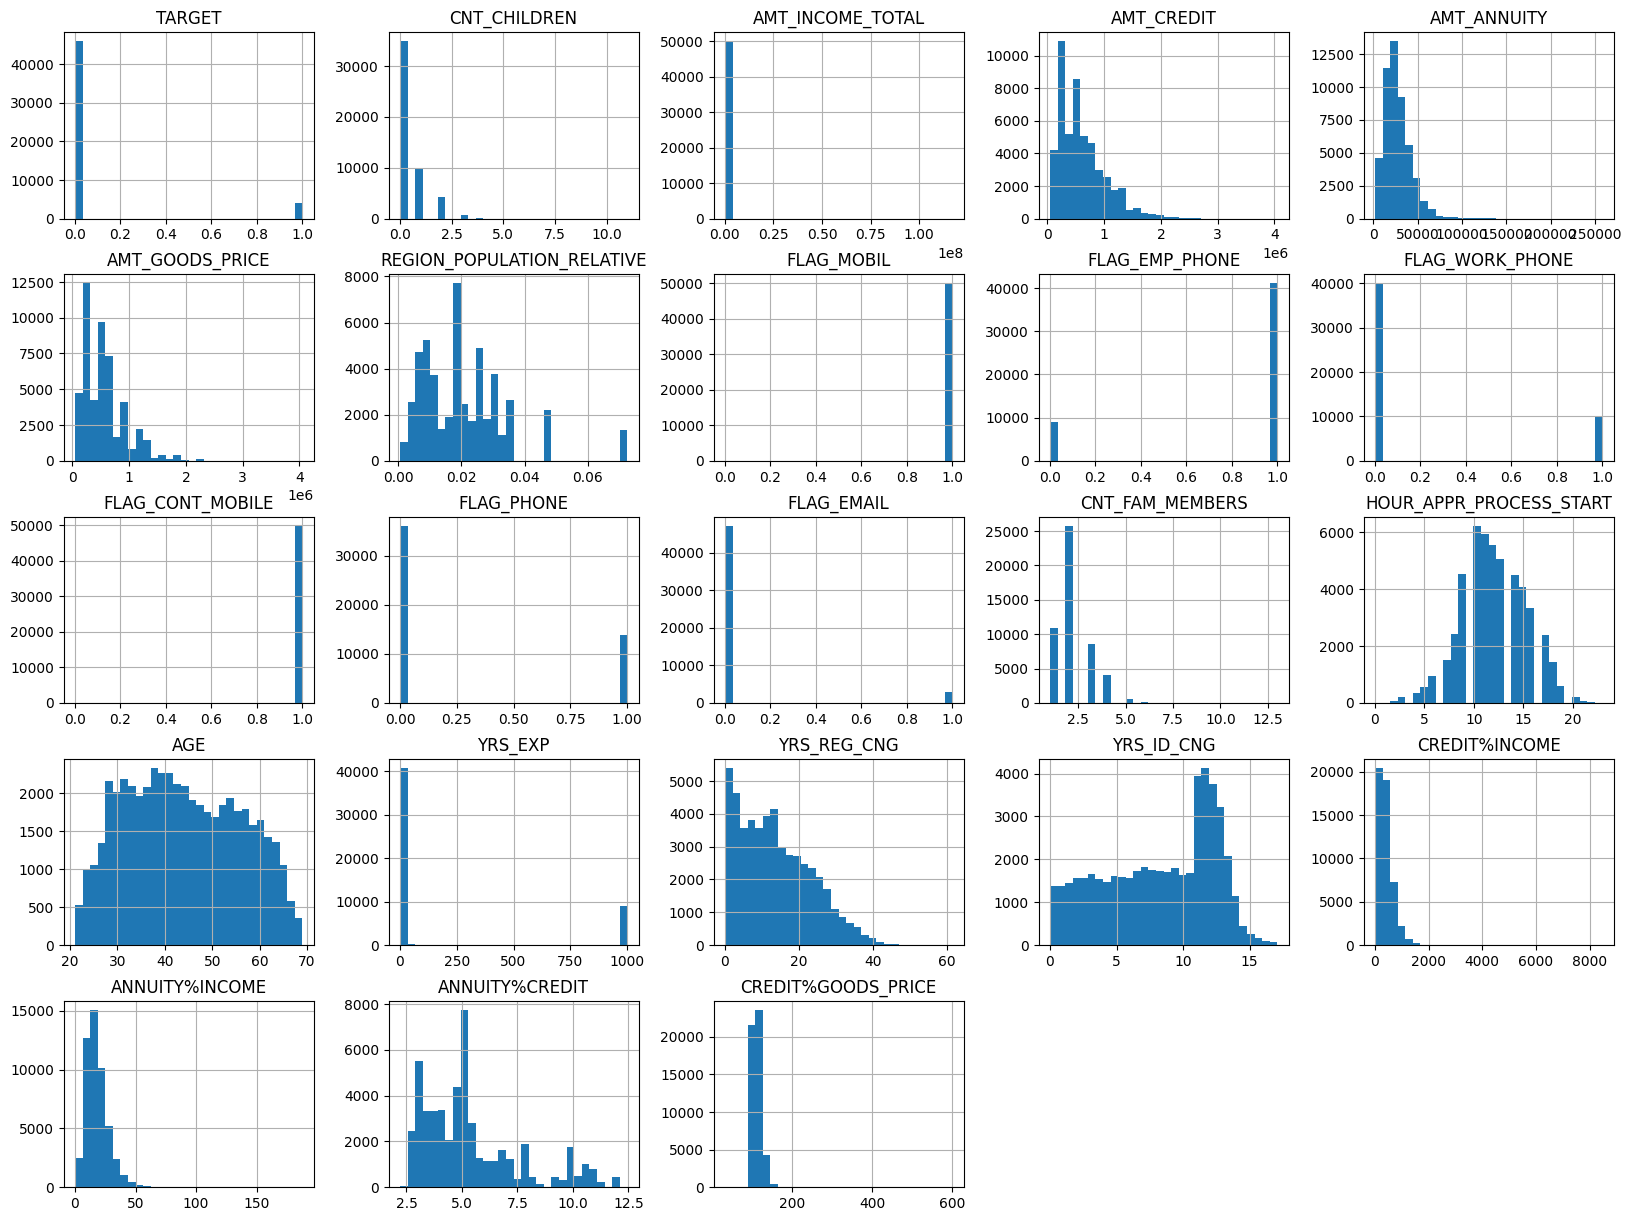

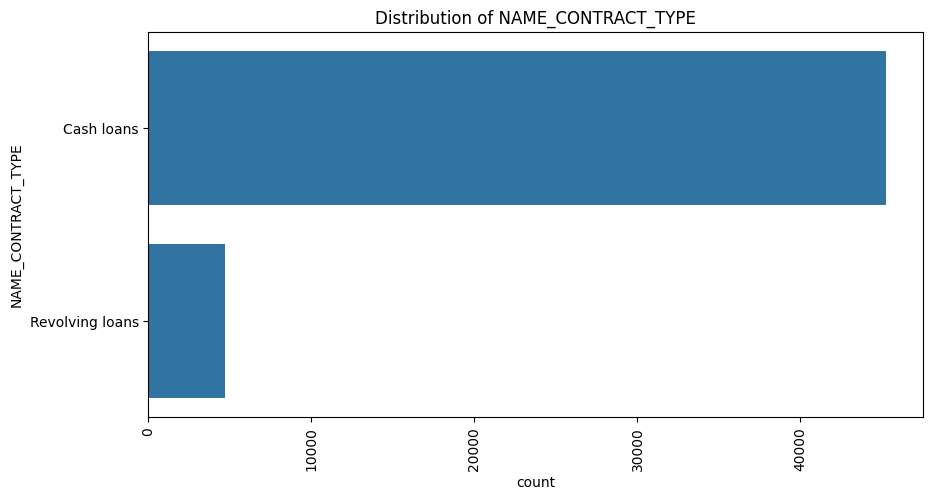

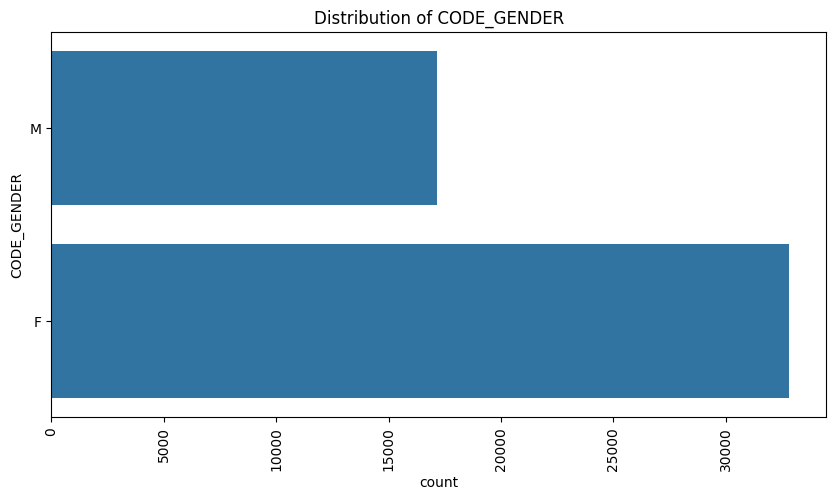

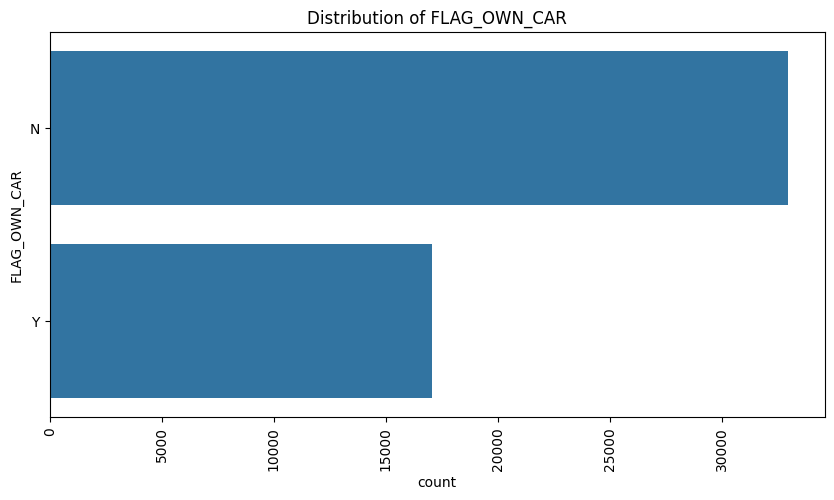

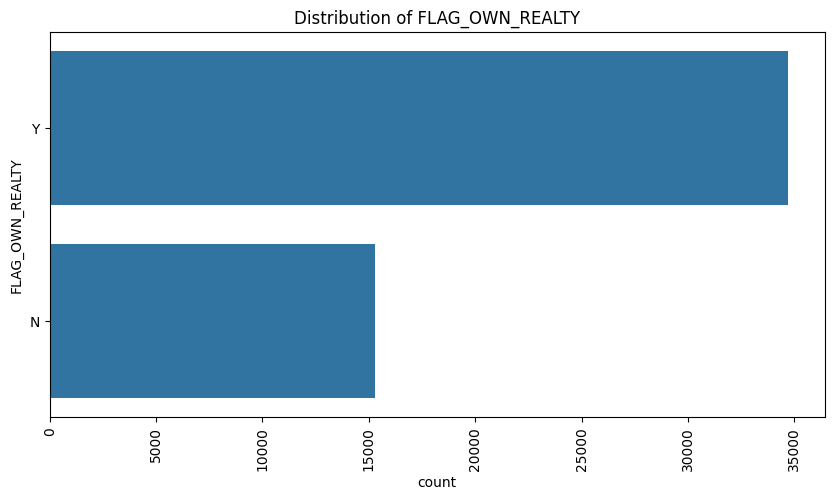

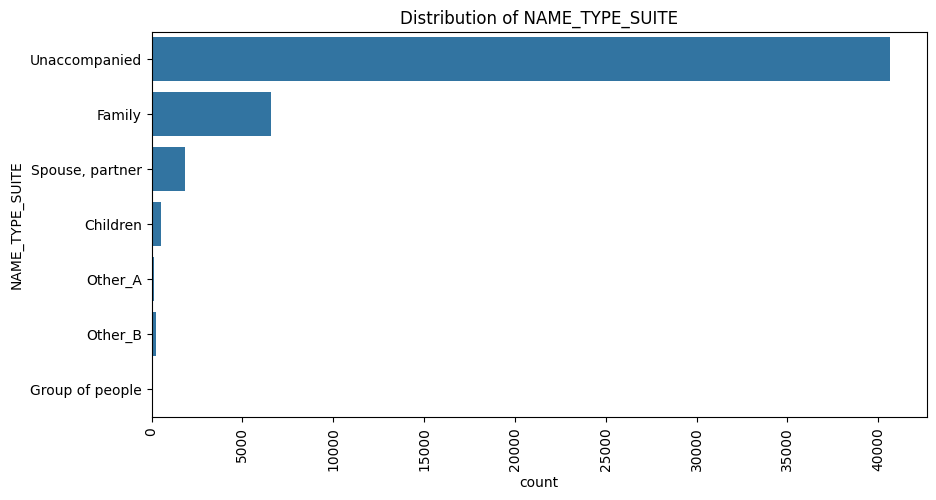

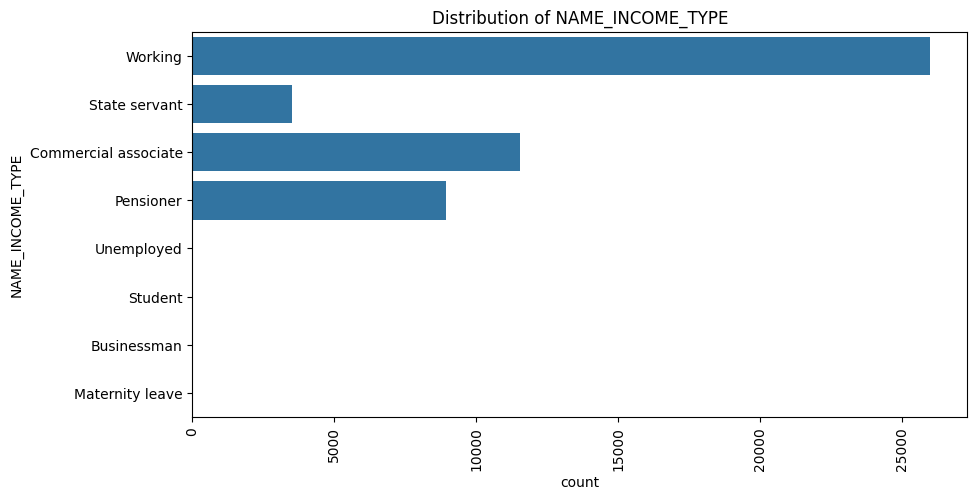

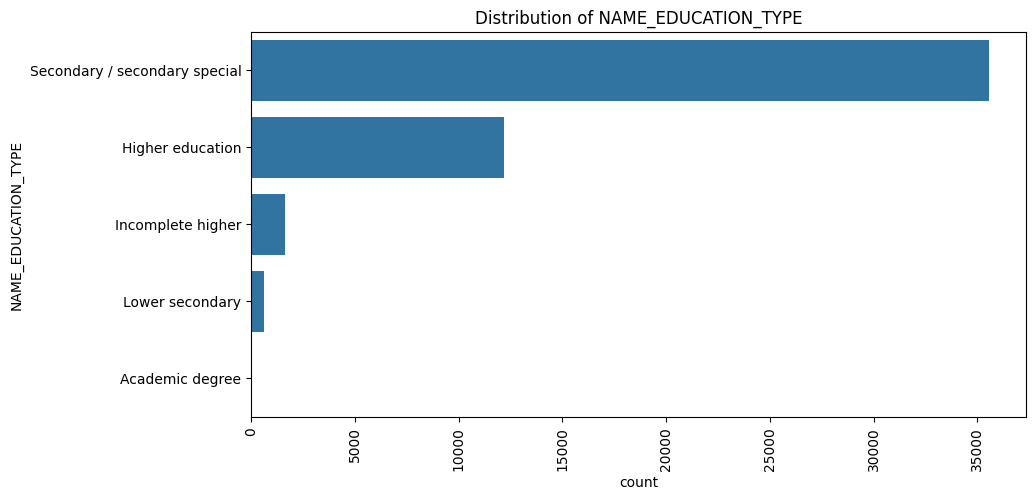

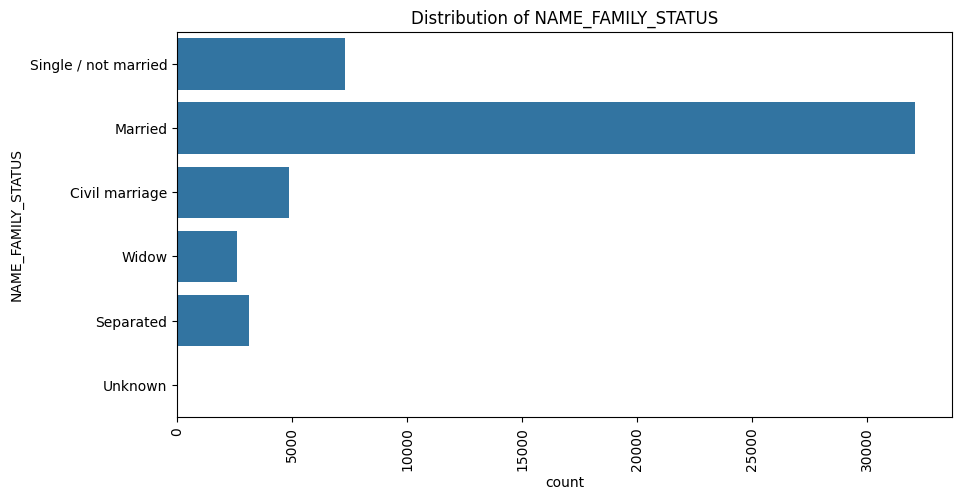

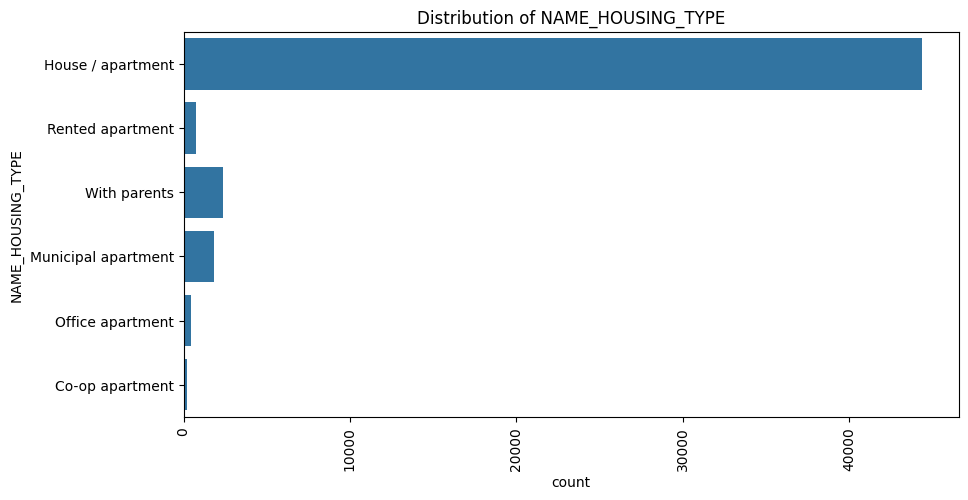

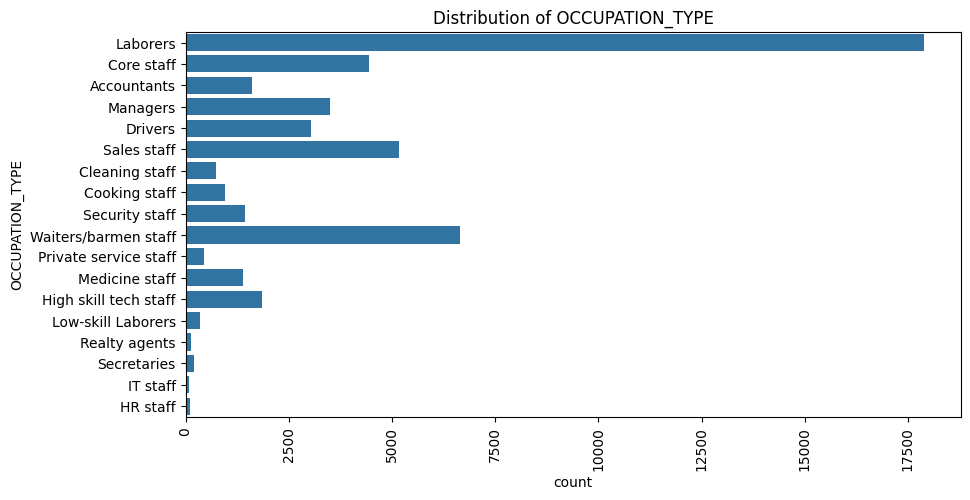

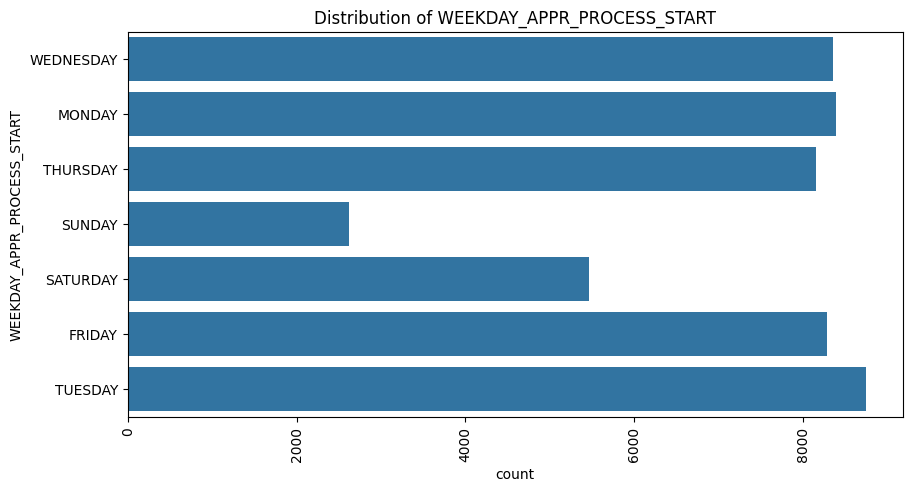

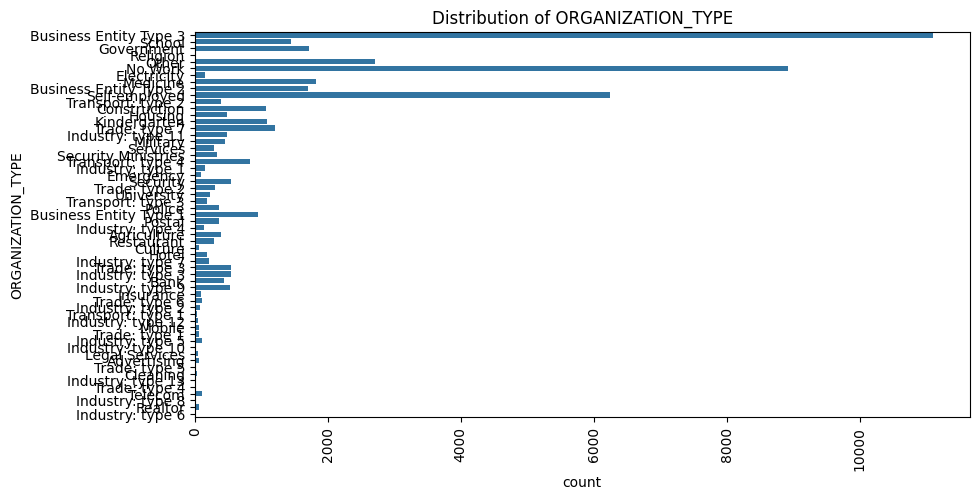

In [ ]:
# Summary statistics
summary_stats = data.describe(include='all')
print(summary_stats)

# Histograms for numerical variables
data.hist(bins=30, figsize=(20, 15))
plt.show()

# Count plots for categorical variables
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data[col])
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)
    plt.show()

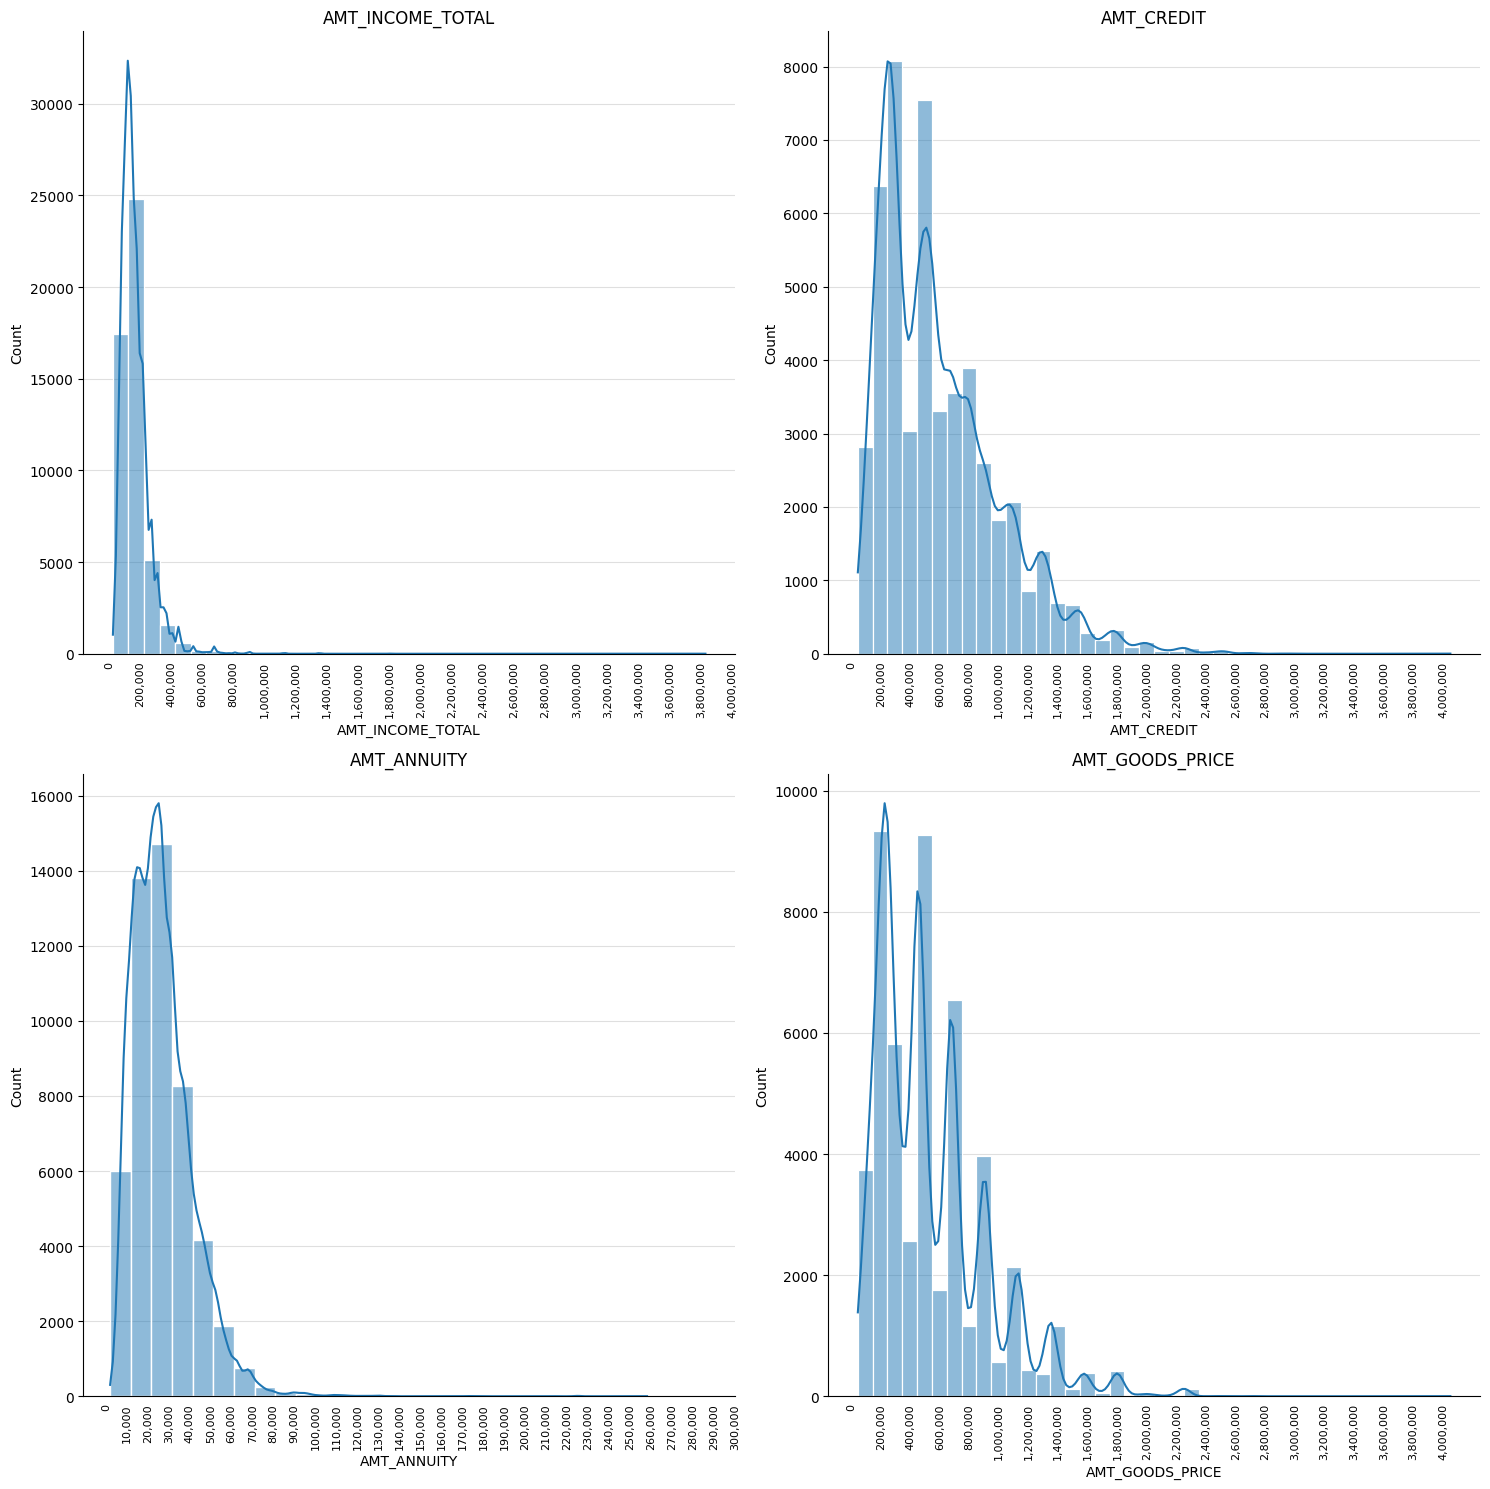

In [ ]:
fig, axs = plt.subplots(2,2,figsize=(15, 15))
a=0
b=0
for idx, i in enumerate(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']):

    if i =='AMT_ANNUITY':
        sns.histplot(data, x=i, ax=axs[a][b], binwidth=10000, edgecolor='white', kde=True)
        axs[a][b].set_xticks(list(np.arange(0,310000,10000)), list(np.arange(0,310000,10000)), fontsize=8)
    else:
        sns.histplot(data, x=i, ax=axs[a][b], binwidth=100000, edgecolor='white', kde=True)
        axs[a][b].set_xticks(list(np.arange(0,4100000,200000)), list(np.arange(0,4100000,200000)), fontsize=8)

    axs[a][b].tick_params(axis='x', pad=5, length=0, labelrotation=90)
    axs[a][b].grid(axis='y', alpha=0.4)
    axs[a][b].set_axisbelow(True)
    axs[a][b].xaxis.set_major_formatter(x_format)

    #Remove the axis lines on all four sides
    axs[a][b].spines['top'].set_visible(False)
    axs[a][b].spines['right'].set_visible(False)

    axs[a][b].set_title(i)
    b=b+1
    if idx==1:
        a=1
        b=0
fig.tight_layout()
plt.show()

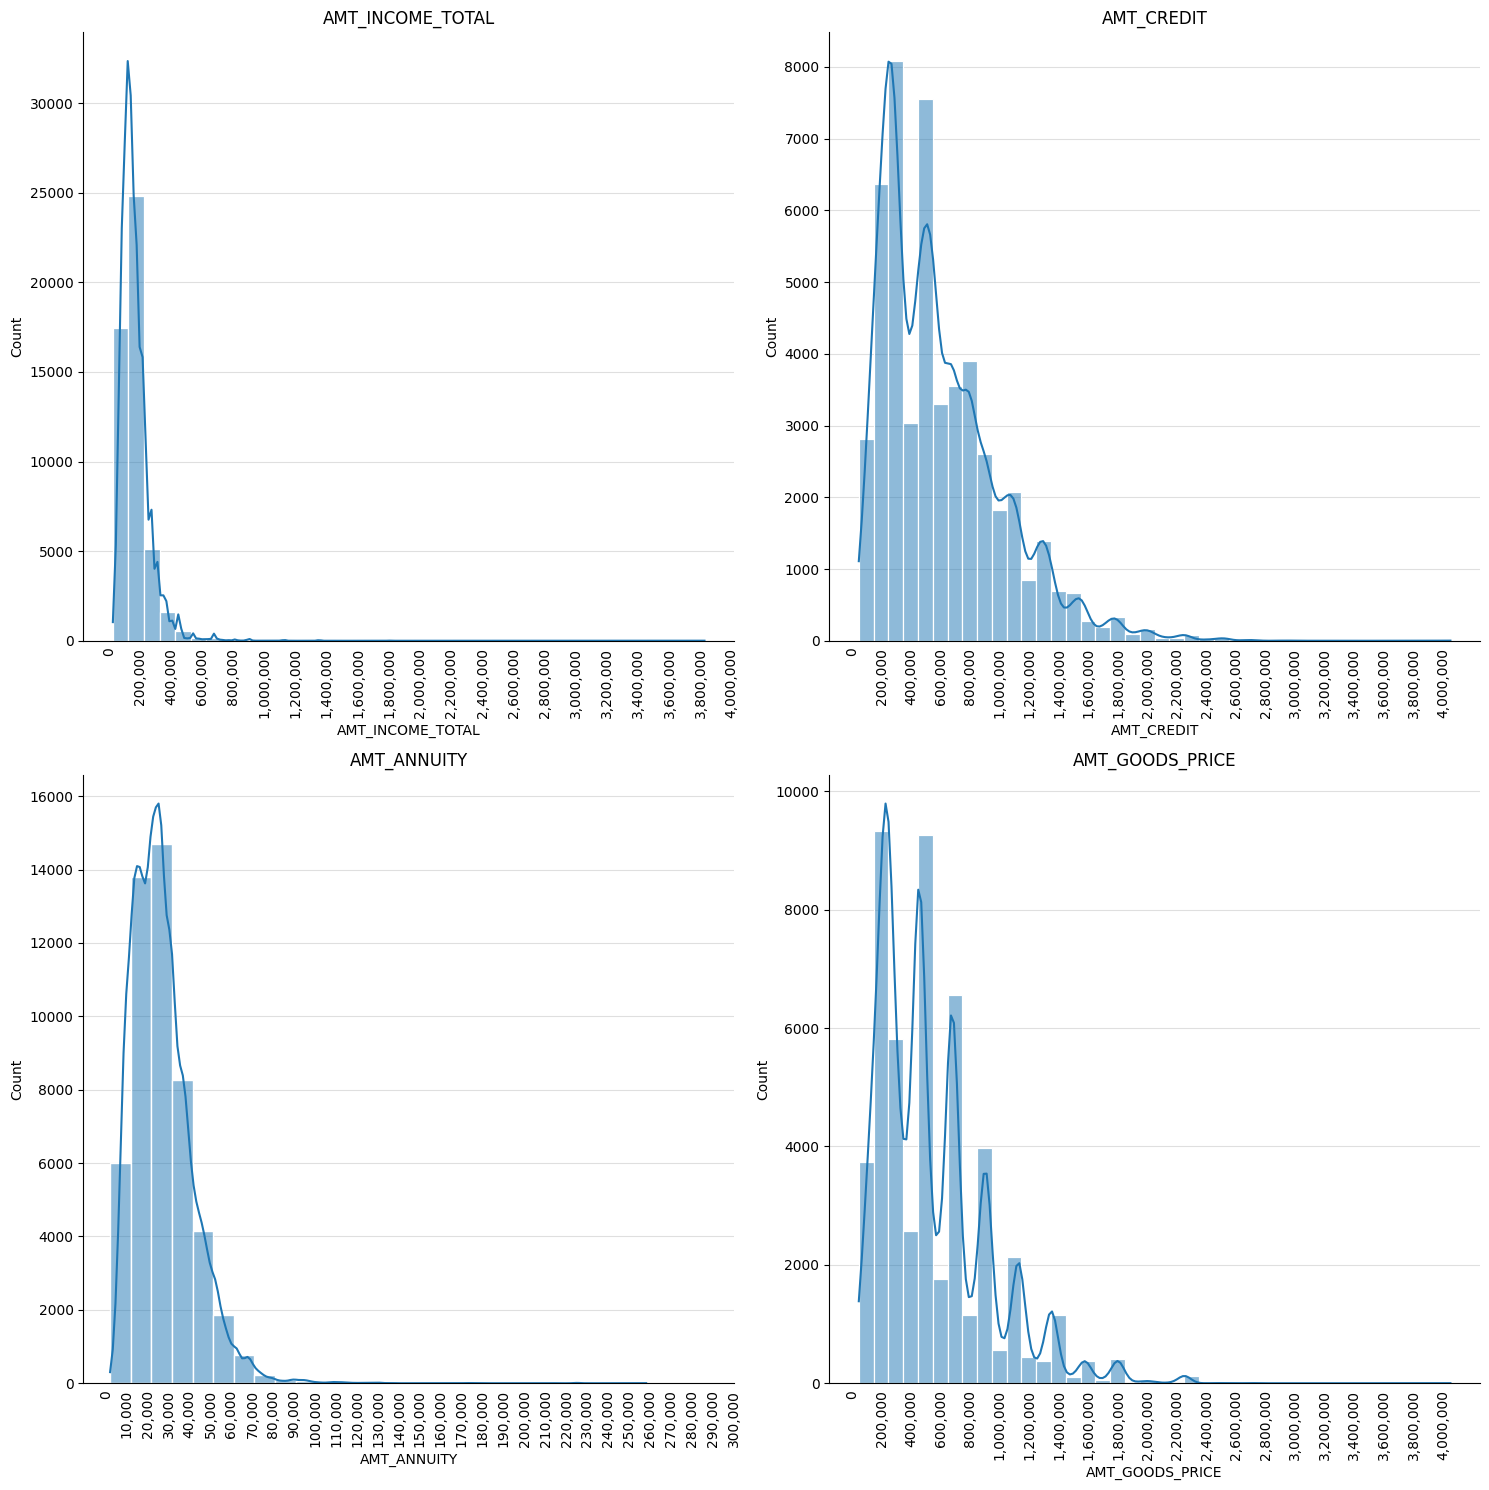

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as tkr

# Sample DataFrame creation for demonstration (replace with your actual data)
# dfc = pd.read_csv('your_data.csv')  # Example of loading your data

# Define the formatter for the x-axis
def func(x, pos):
    return '{:0,d}'.format(int(x))

x_format = tkr.FuncFormatter(func)

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
a, b = 0, 0

# Plot histograms
for idx, i in enumerate(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']):
    if i == 'AMT_ANNUITY':
        sns.histplot(data, x=i, ax=axs[a][b], binwidth=10000, edgecolor='white', kde=True)
        axs[a][b].set_xticks(np.arange(0, 310000, 10000))
    else:
        sns.histplot(data, x=i, ax=axs[a][b], binwidth=100000, edgecolor='white', kde=True)
        axs[a][b].set_xticks(np.arange(0, 4100000, 200000))

    axs[a][b].tick_params(axis='x', pad=5, length=0, labelrotation=90)
    axs[a][b].grid(axis='y', alpha=0.4)
    axs[a][b].set_axisbelow(True)
    axs[a][b].xaxis.set_major_formatter(x_format)

    # Remove the axis lines on top and right
    axs[a][b].spines['top'].set_visible(False)
    axs[a][b].spines['right'].set_visible(False)

    axs[a][b].set_title(i)

    # Update subplot indices
    b += 1
    if idx == 1:
        a = 1
        b = 0

fig.tight_layout()
plt.show()


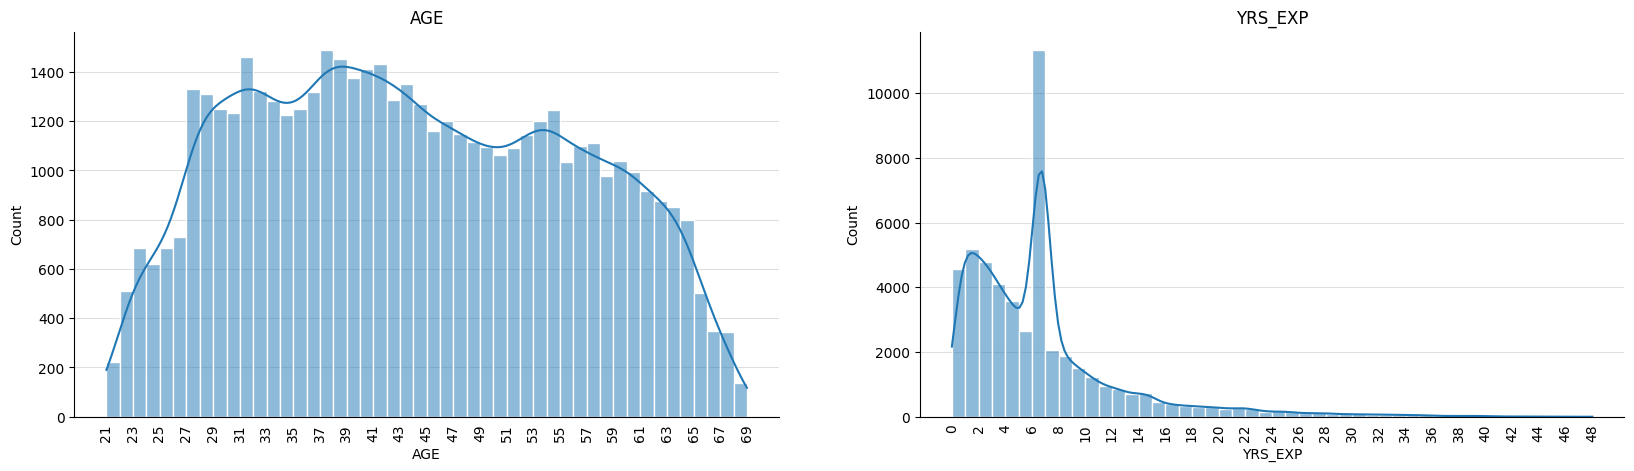

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame creation for demonstration (replace with your actual data)
# data = pd.read_csv('your_data.csv')  # Example of loading your data

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
a = 0

# Plot histograms
for i in ['AGE', 'YRS_EXP']:
    sns.histplot(data, x=i, ax=axs[a], binwidth=1, edgecolor='white', kde=True)

    # Setting x-ticks
    axs[a].set_xticks(np.arange(int(data[i].min()), int(data[i].max()) + 2, 2))
    axs[a].tick_params(axis='x', pad=5, length=0, labelrotation=90)

    # Grid and axis settings
    axs[a].grid(axis='y', alpha=0.4)
    axs[a].set_axisbelow(True)

    # Remove the axis lines on top and right
    axs[a].spines['top'].set_visible(False)
    axs[a].spines['right'].set_visible(False)

    axs[a].set_title(i)
    a += 1

plt.show()


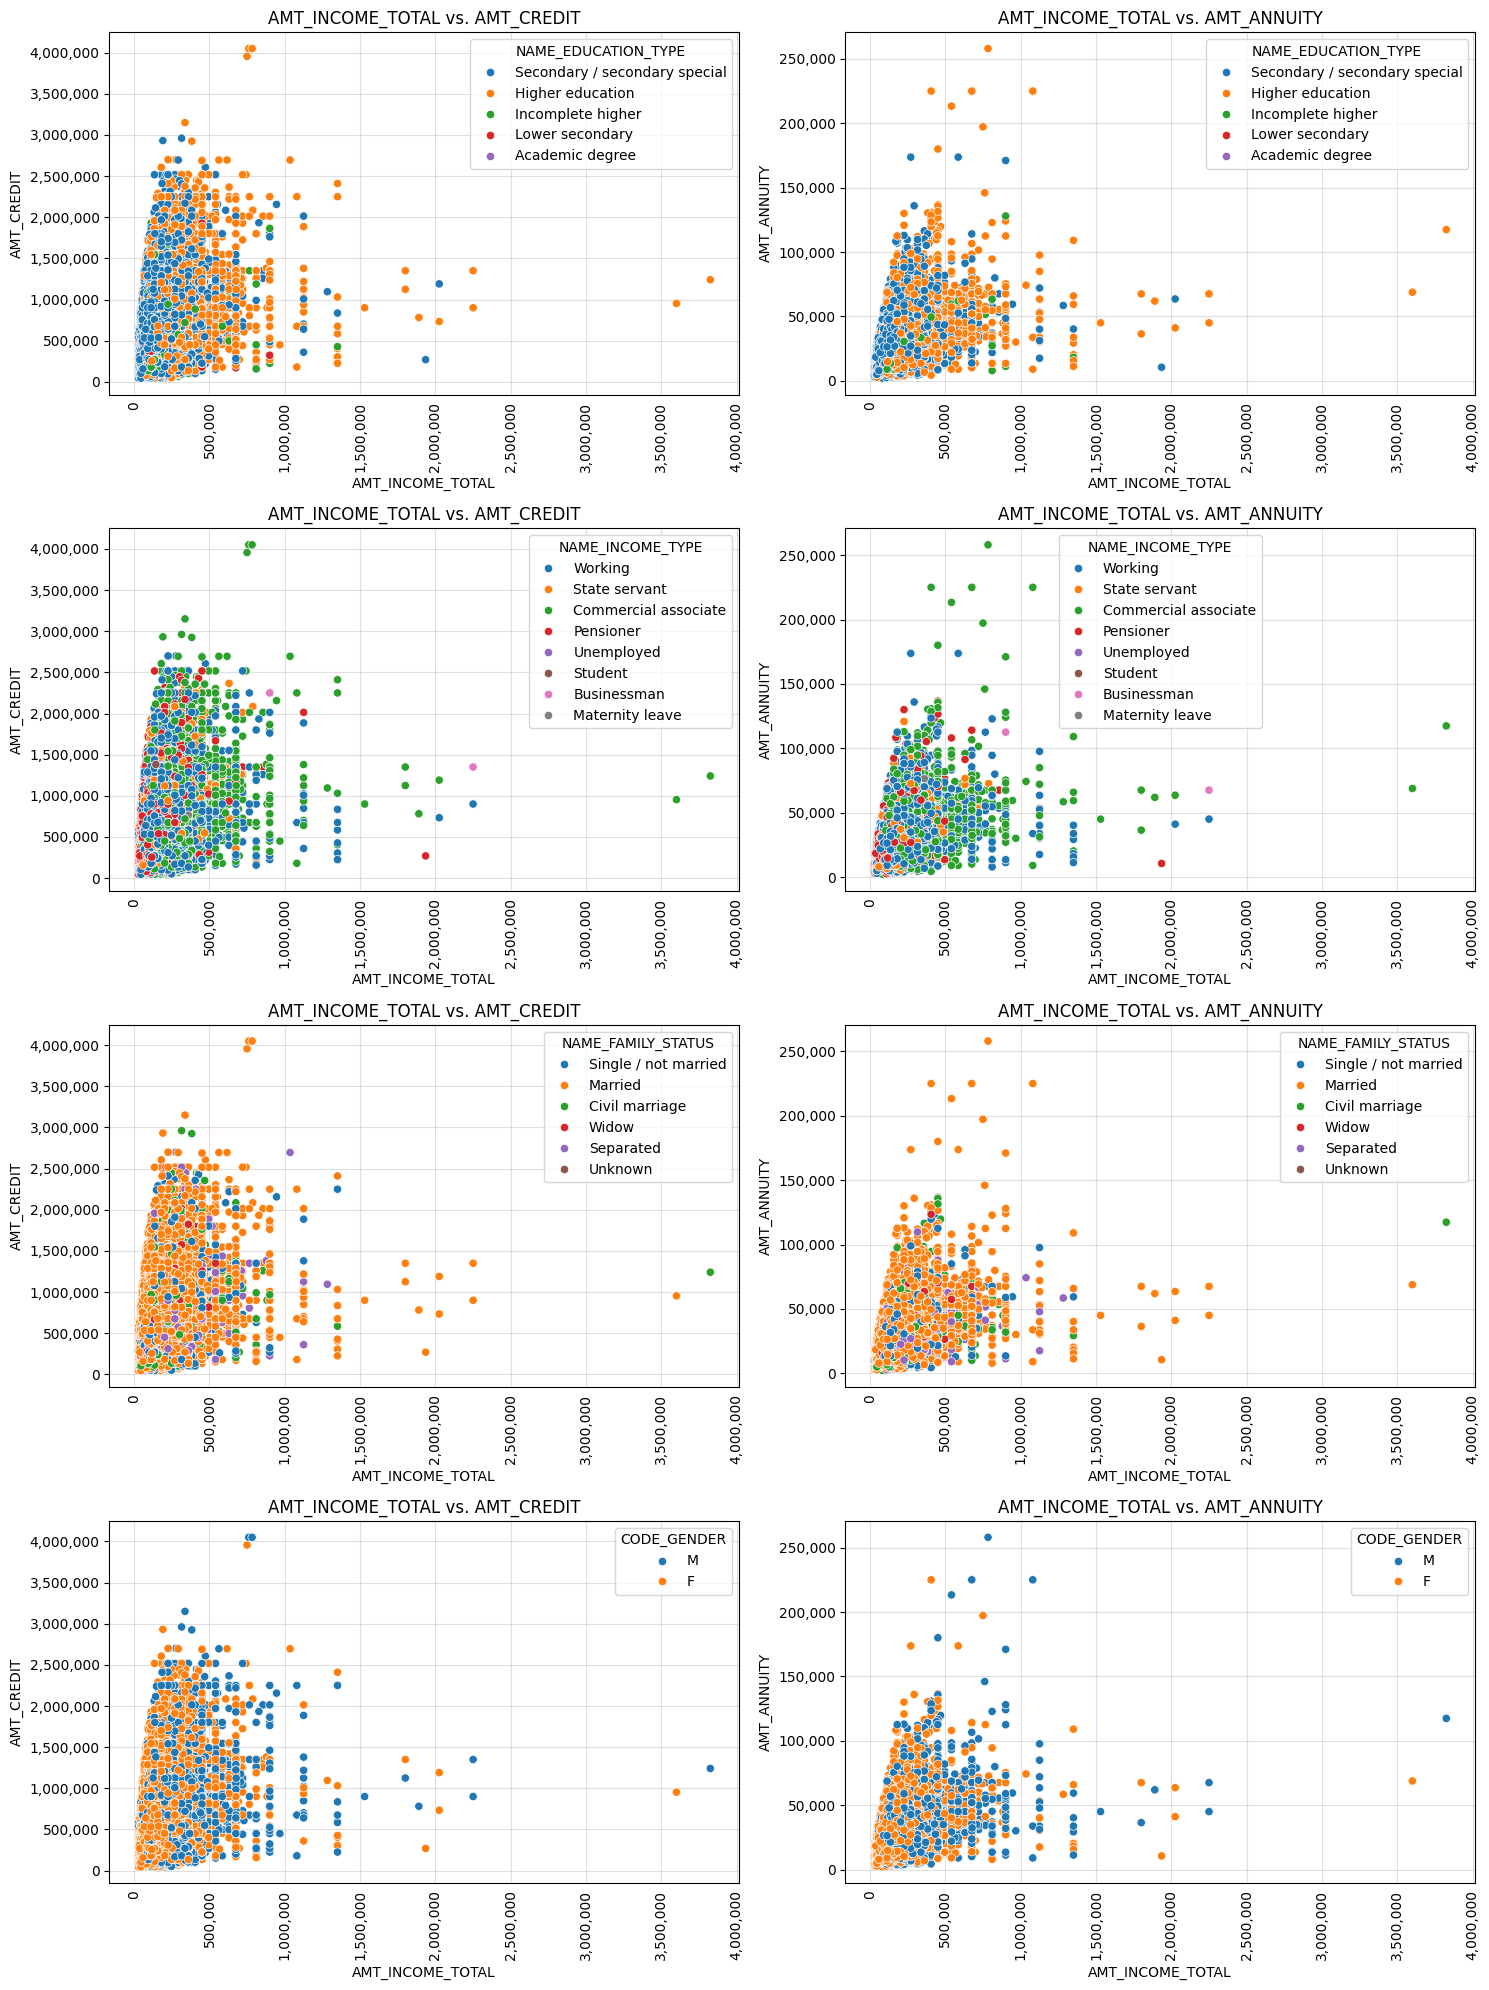

In [ ]:
fig, axs = plt.subplots(4,2,figsize=(15,20))
a=0
b=0
h=['NAME_EDUCATION_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_FAMILY_STATUS', 'CODE_GENDER', 'CODE_GENDER']
for idx, i in enumerate([('AMT_INCOME_TOTAL', 'AMT_CREDIT'), ('AMT_INCOME_TOTAL', 'AMT_ANNUITY')]*4):

    if b==2:
        a=a+1
        b=0

    sns.scatterplot(data, x=i[0], y=i[1], ax=axs[a][b], hue=h[idx])

    axs[a][b].tick_params(axis='x', pad=5, length=0, labelrotation=90)
    axs[a][b].grid(axis='x', alpha=0.4)
    axs[a][b].set_axisbelow(True)
    axs[a][b].grid(axis='y', alpha=0.4)
    axs[a][b].set_axisbelow(True)
    axs[a][b].yaxis.set_major_formatter(x_format)
    axs[a][b].xaxis.set_major_formatter(x_format)

    axs[a][b].set_title(i[0]+' vs. '+i[1])

    b=b+1

fig.tight_layout()
plt.show()

In [ ]:
data.head()

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0       1         Cash loans           M            N               Y   
1       0         Cash loans           F            N               N   
2       0    Revolving loans           M            Y               Y   
3       0         Cash loans           F            N               Y   
4       0         Cash loans           M            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working  Secondary / secondary special   
1          Family    State servant               Higher education   
2   Unaccompanied          Working  Secondary / secondary special   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           1   
1           1               1                0                 1           1   
2           1               1                1                 1           1   
3           1               1                0                 1           0   
4           1               1                0                 1           0   

   FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS WEEKDAY_APPR_PROCESS_START  \
0           0        Laborers                1                  WEDNESDAY   
1           0      Core staff                2                     MONDAY   
2           0        Laborers                1                     MONDAY   
3           0        Laborers                2                  WEDNESDAY   
4           0      Core staff                1                   THURSDAY   

   HOUR_APPR_PROCESS_START       ORGANIZATION_TYPE     AGE  YRS_EXP  \
0                       10  Business Entity Type 3  25.921    1.745   
1                       11                  School  45.932    3.255   
2                        9              Government  52.181    0.616   
3                       17  Business Entity Type 3  52.068    8.326   
4                       11                Religion  54.608    8.323   

   YRS_REG_CNG  YRS_ID_CNG  CREDIT%INCOME  ANNUITY%INCOME  ANNUITY%CREDIT  \
0        9.995       5.808        200.789          12.198           6.075   
1        3.249       0.797        479.075          13.222           2.760   
2       11.671       6.934        200.000          10.000           5.000   
3       26.940       6.677        231.617          21.990           9.494   
4       11.811       9.474        422.222          17.996           4.262   

   CREDIT%GOODS_PRICE  
0              115.84  
1              114.52  
2              100.00  
3              105.28  
4              100.00

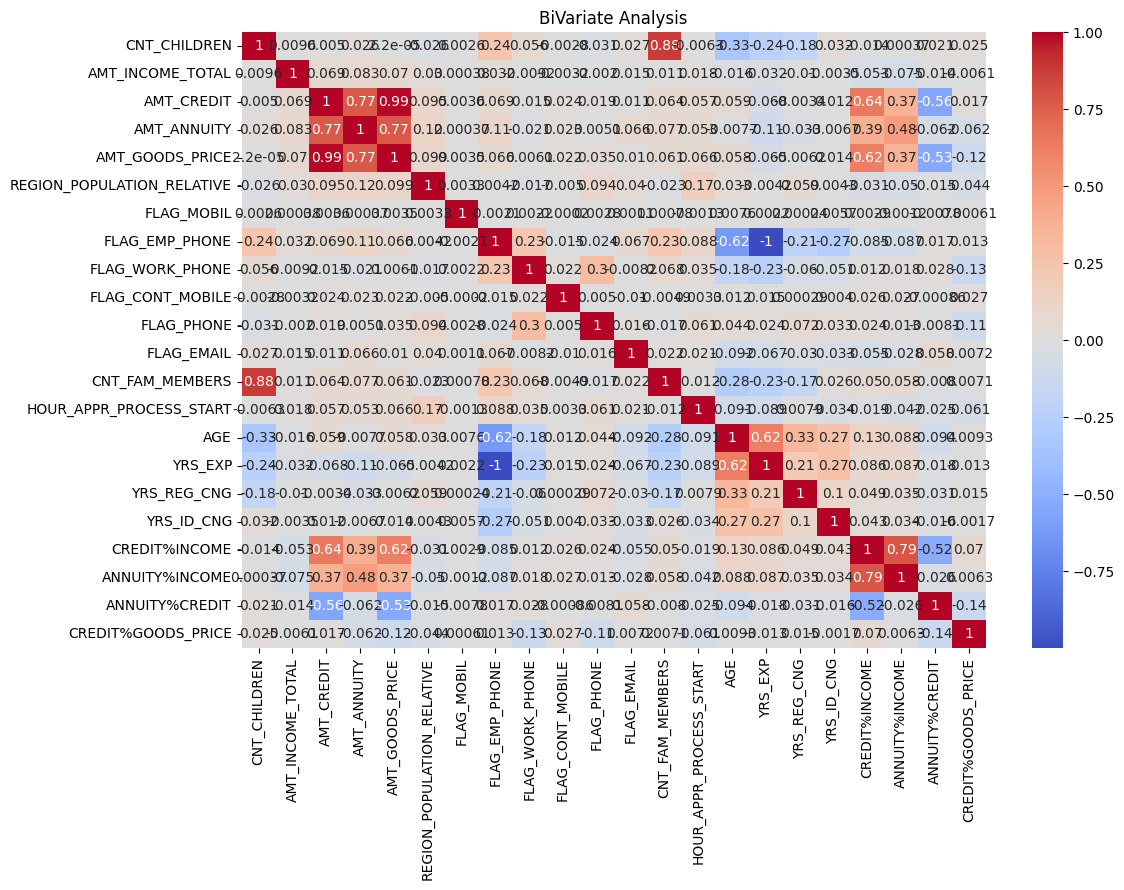

In [ ]:
# Select only numerical columns before calculating correlation
numerical_data = data.select_dtypes(include=['number'])

# Correlation matrix for numerical variables
corr_matrix = numerical_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('BiVariate Analysis')
plt.show()


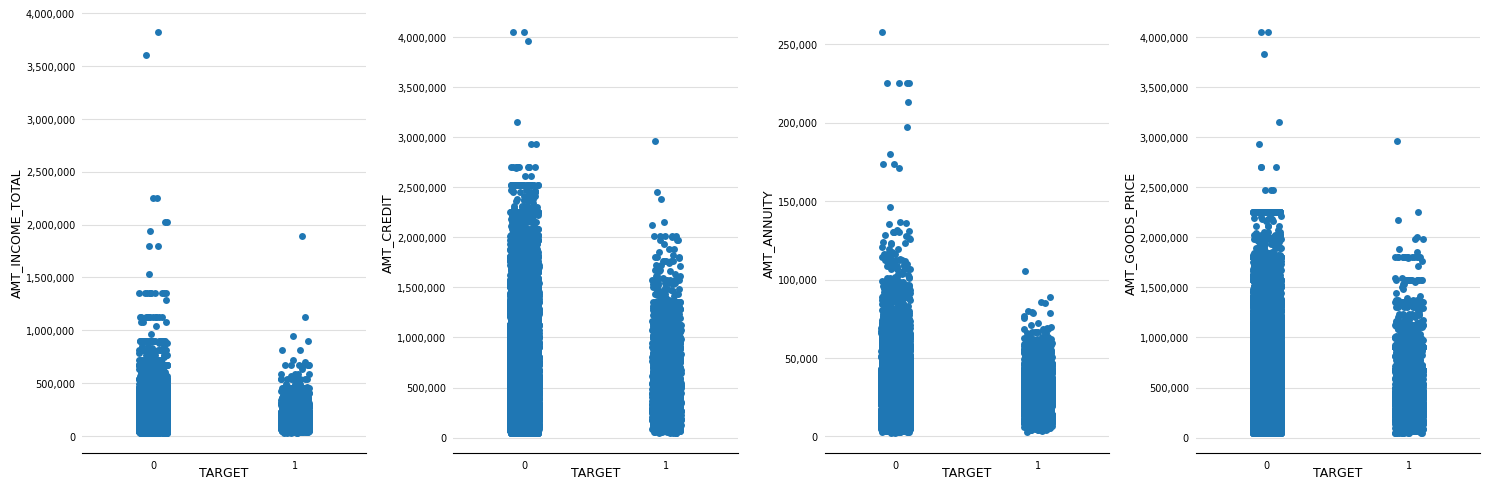

In [ ]:
fig, axs = plt.subplots(1,4, figsize=(15,5))
for idx,i in enumerate(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']):

    sns.stripplot(data=data, x="TARGET", y=i, jitter=0.1, ax=axs[idx])

    axs[idx].tick_params(axis='x', pad=5, length=0, labelsize=7)
    axs[idx].tick_params(axis='y', pad=5, length=0, labelsize=7)

    axs[idx].set_ylabel(i, fontsize=9, labelpad=2)
    axs[idx].set_xlabel("TARGET", fontsize=9, labelpad=-3)

    axs[idx].yaxis.set_major_formatter(x_format)

    axs[idx].grid(axis='y', alpha=0.4)
    axs[idx].set_axisbelow(True)

    axs[idx].spines['top'].set_visible(False)
    axs[idx].spines['right'].set_visible(False)
    axs[idx].spines['left'].set_visible(False)

fig.tight_layout()
plt.show()

In [ ]:
del data1

In [ ]:
data0=repl_0_1(data0)
data1=repl_0_1(data1)

NAME_CONTRACT_TYPE --- 0 --- Cash loans
NAME_CONTRACT_TYPE --- 1 --- Revolving loans


CODE_GENDER --- 0 --- F
CODE_GENDER --- 1 --- M


FLAG_OWN_CAR --- 0 --- N
FLAG_OWN_CAR --- 1 --- Y


FLAG_OWN_REALTY --- 0 --- N
FLAG_OWN_REALTY --- 1 --- Y


NAME_CONTRACT_TYPE --- 0 --- Cash loans
NAME_CONTRACT_TYPE --- 1 --- Revolving loans


CODE_GENDER --- 0 --- M
CODE_GENDER --- 1 --- F


FLAG_OWN_CAR --- 0 --- N
FLAG_OWN_CAR --- 1 --- Y


FLAG_OWN_REALTY --- 0 --- Y
FLAG_OWN_REALTY --- 1 --- N




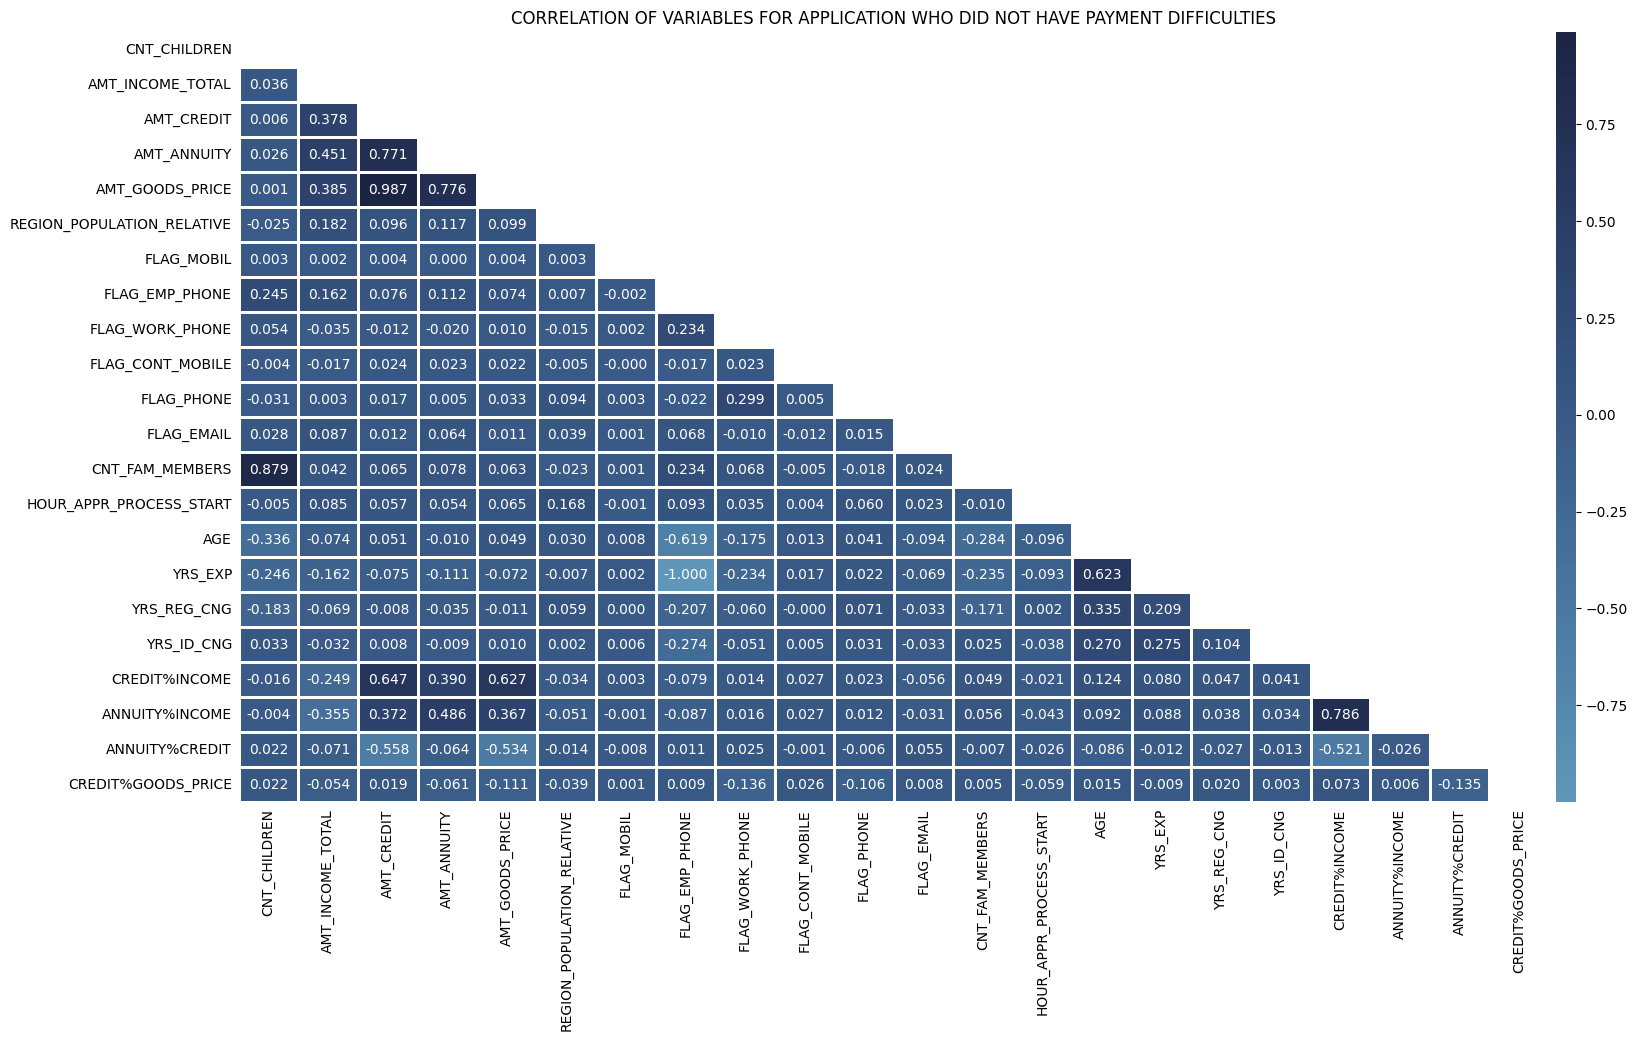

In [ ]:
data_0 = data[data['TARGET'] == 0]  # Create data_0 for applicants without difficulties
# Select only numerical columns before calculating correlations
data_0_corr = data_0.select_dtypes(include=['number']).corr().dropna(axis='index', how='all').dropna(axis='columns', how='all')

fig, axs = plt.subplots(1,1,figsize=(20, 10))

mask = np.triu(np.ones_like(data_0_corr))
sns.heatmap(data_0_corr, annot=True, square=False, fmt=".3f", linewidth=1.0,
            cmap=sns.cubehelix_palette(rot=-0.2, gamma=1.2, hue=1.0, light=0.6, dark=0.2, as_cmap=True),
            mask=mask, cbar=True, cbar_kws={'shrink':1, 'pad':0.005, 'aspect': 40})

axs.tick_params(axis='x', pad=5, length=0)
axs.tick_params(axis='y', pad=5, length=0)

axs.set_title("CORRELATION OF VARIABLES FOR APPLICATION WHO DID NOT HAVE PAYMENT DIFFICULTIES")

plt.show()

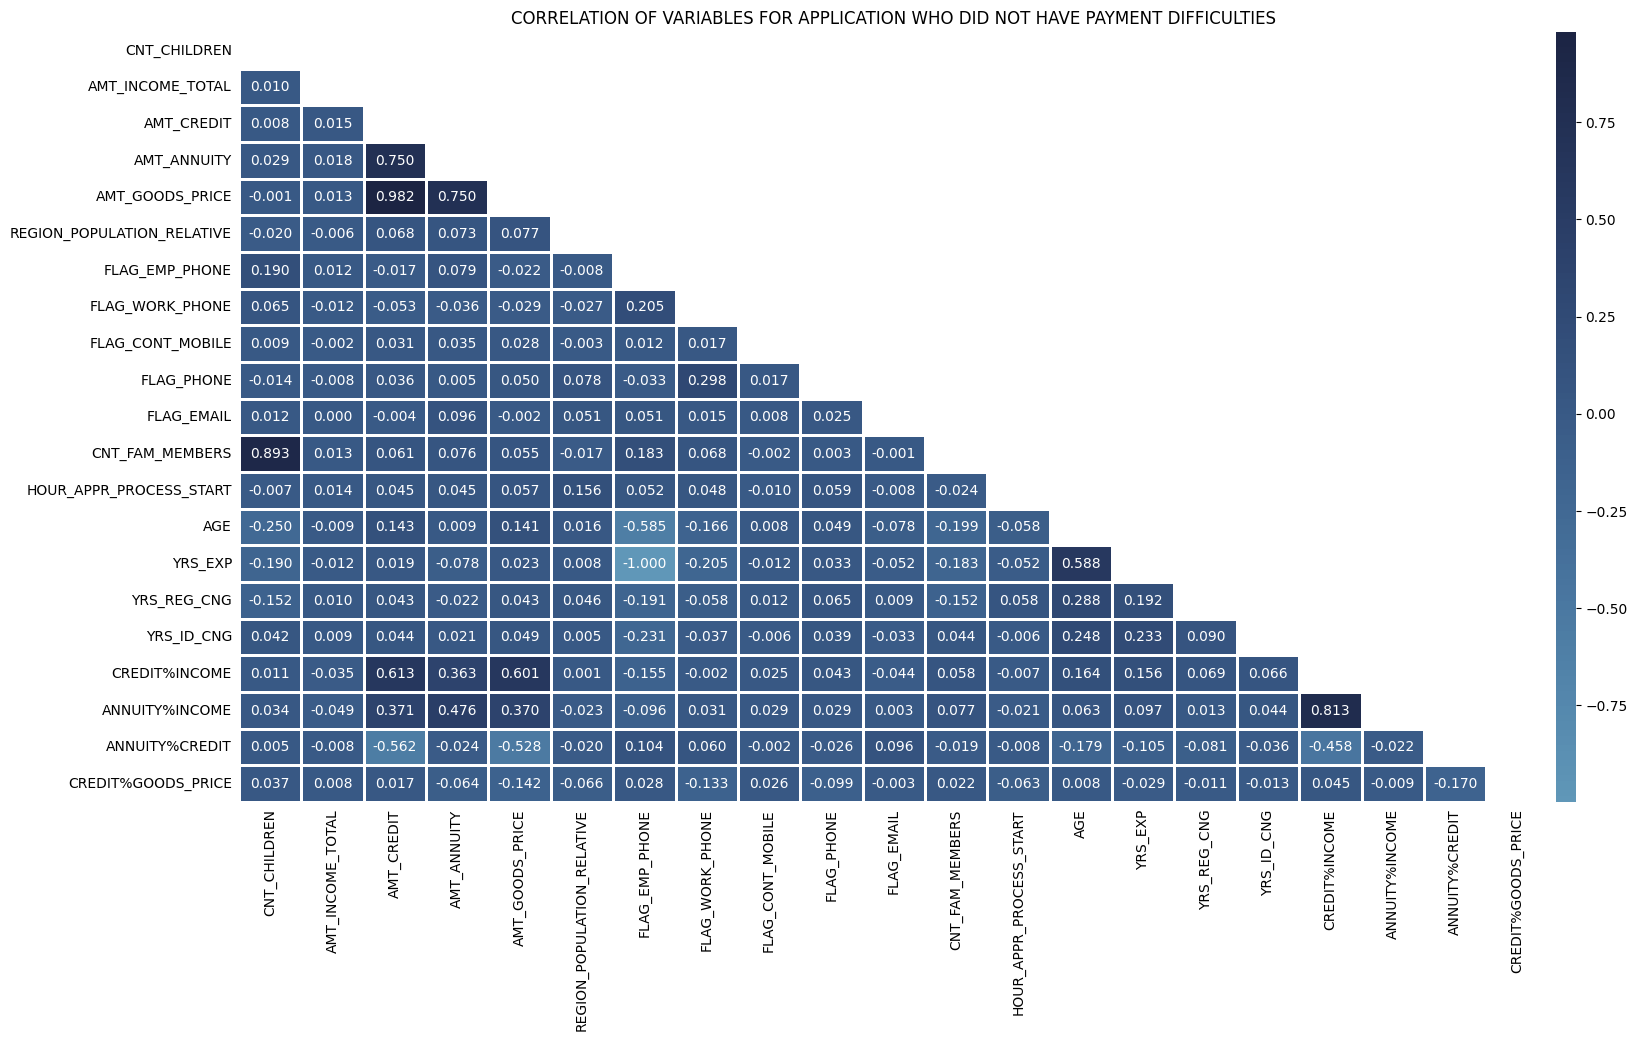

In [ ]:
data_1 = data[data['TARGET'] == 1]  # Create data_0 for applicants without difficulties
# Select only numerical columns before calculating correlations
data_1_corr = data_1.select_dtypes(include=['number']).corr().dropna(axis='index', how='all').dropna(axis='columns', how='all')

fig, axs = plt.subplots(1,1,figsize=(20, 10))

mask = np.triu(np.ones_like(data_1_corr))
sns.heatmap(data_1_corr, annot=True, square=False, fmt=".3f", linewidth=1.0,
            cmap=sns.cubehelix_palette(rot=-0.2, gamma=1.2, hue=1.0, light=0.6, dark=0.2, as_cmap=True),
            mask=mask, cbar=True, cbar_kws={'shrink':1, 'pad':0.005, 'aspect': 40})

axs.tick_params(axis='x', pad=5, length=0)
axs.tick_params(axis='y', pad=5, length=0)

axs.set_title("CORRELATION OF VARIABLES FOR APPLICATION WHO DID NOT HAVE PAYMENT DIFFICULTIES")

plt.show()

In [ ]:
data_0_10=data_0_corr.where(np.triu(np.ones(data_0_corr.shape), k=1).astype(bool)).stack().reset_index().sort_values(0, ascending=False, key=lambda x: abs(x)).iloc[0:10] # Use bool instead of np.bool
data_0_10.columns=['Column_1', 'Column_2', 'Correlation']
data_0_10['Col1_Col2']=data_0_10[['Column_1', 'Column_2']].agg(' -- '.join, axis=1)
data_1_10=data_1_corr.where(np.triu(np.ones(data_1_corr.shape), k=1).astype(bool)).stack().reset_index().sort_values(0, ascending=False, key=lambda x: abs(x)).iloc[0:10] # Use bool instead of np.bool
data_1_10.columns=['Column_1', 'Column_2', 'Correlation']
data_1_10['Col1_Col2']=data_1_10[['Column_1', 'Column_2']].agg(' -- '.join, axis=1)
def plot_corr(dft, s1, s2):
    fig, axs = plt.subplots(1,1, figsize=(8,10))

    axs.bar(dft['Col1_Col2'], dft['Correlation'], width=0.5, linewidth=0.8, edgecolor='#686868', color='#3E849E')

    for p in axs.patches:
        if p.get_height()<0:
            a=(-0.05)
        else:
            a=0.01
        axs.annotate(f"{round(p.get_height(),3)}", xy=(p.get_x()+p.get_width()/2, p.get_y()+p.get_height()+a), ha='center', fontsize=8)

    #The axis lines on all but left side are removed for left hand side subplot
    axs.spines['top'].set_visible(False)
    axs.spines['right'].set_visible(False)
    axs.spines['left'].set_visible(False)

    # Grid is set for ticks in x-axis only
    axs.grid(axis='y', alpha=0.5)
    axs.set_axisbelow(True)
    plt.axhline(0, color='black')

    axs.set_yticks(list(np.arange(-0.8,1.1,0.1)))
    axs.tick_params(axis='x', pad=5, length=0, labelrotation=90, labelsize=8)

    axs.tick_params(axis='y', pad=5, length=0, labelsize=8)

    title='Top 10 Variable Correlations For Applicants Who \n'+s1+' Payment Difficulties (TARGET '+str(s2)+')'
    axs.set_title(title, fontsize=11)

    plt.show()

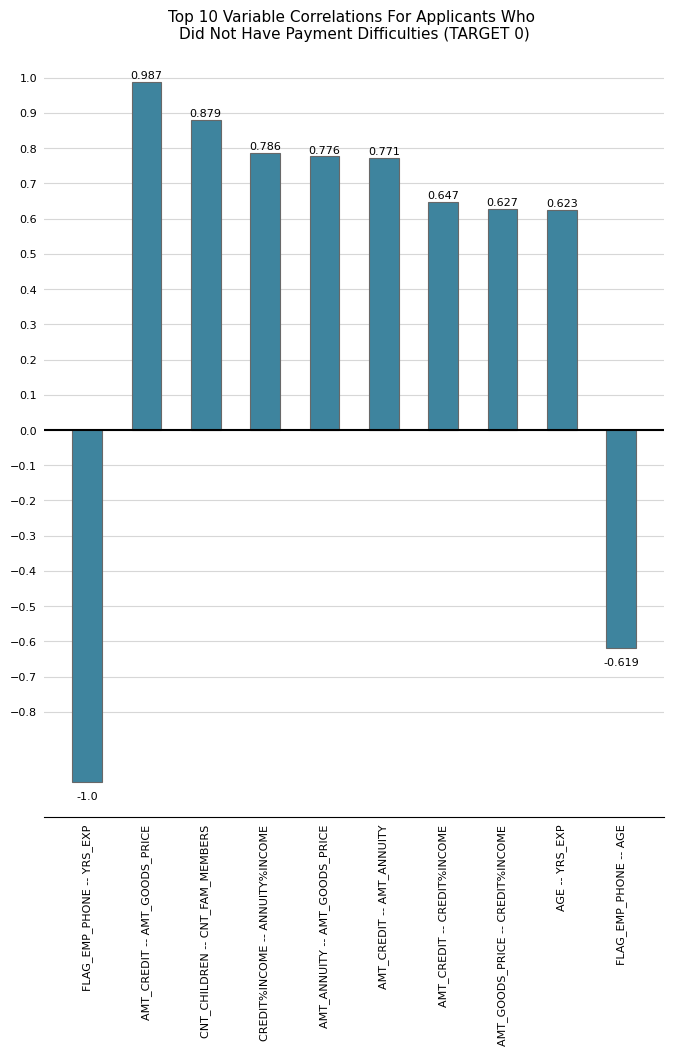

In [ ]:
plot_corr(data_0_10, 'Did Not Have', 0)

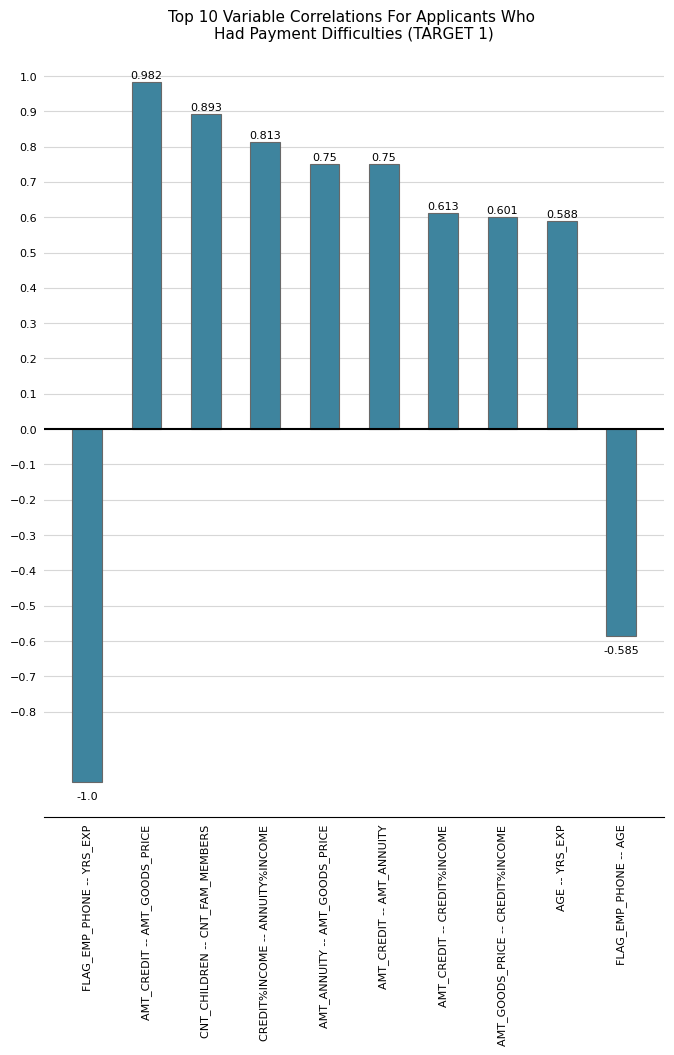

In [ ]:
plot_corr(data_1_10, 'Had', 1)